In [1]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt


In [2]:
#nu = np.arange(1, 100, dtype=float)
#print (nu)
nu = []
for i in range(1, 100):
    nu.append(i)
print("nu = %s" % nu)

nu = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


[0.00013607 0.00076975 0.00212118 0.00435437 0.00760668 0.01196879
 0.01709993 0.02185777 0.02527817 0.0272004  0.0279303  0.02785593
 0.02729137 0.02645338 0.02548058 0.02445782 0.0234352  0.0224412
 0.021491   0.02059176 0.01974587 0.01895292 0.01821095 0.01751718
 0.01686846 0.01626157 0.01569332 0.0151607  0.01466086 0.0141912
 0.01374929 0.01333295 0.01294015 0.01256908 0.01221808 0.01188563
 0.01157036 0.01127102 0.01098648 0.01071569 0.01045771 0.01021167
 0.00997678 0.00975232 0.00953762 0.00933207 0.0091351  0.00894619
 0.00876488 0.0085907  0.00842327 0.00826219 0.00810711 0.00795771
 0.00781369 0.00767476 0.00754066 0.00741115 0.00728598 0.00716496
 0.00704788 0.00693454 0.00682478 0.00671843 0.00661534 0.00651535
 0.00641832 0.00632414 0.00623268 0.00614381 0.00605744 0.00597346
 0.00589177 0.00581228 0.0057349  0.00565956 0.00558616 0.00551464
 0.00544492 0.00537694 0.00531064 0.00524595 0.00518281 0.00512118
 0.00506099 0.00500219 0.00494475 0.00488861 0.00483373 0.004780

/usr/lib/python3/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


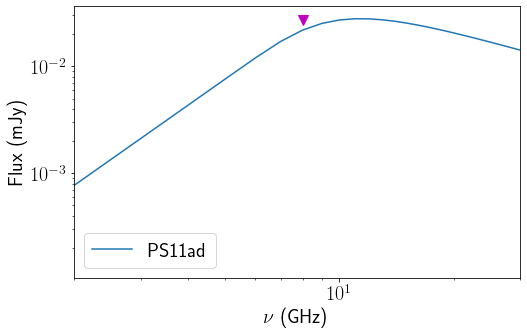

In [12]:
#PS11ad
#Synchrotron model of the fluxes
import numpy as np
plt.rc('text', usetex=True)

t =1224.288326 
t_p = 1224.288326 #days
nu =np.arange(1, 100, dtype=float)
nu_p = 10 #GHz
F_nup = 0.0272 #mjansky 2.72E-05
m = 0.88 #using stAandard model
p = 3.0 #using standard model
a = (2*m)+0.5
b = (p+5-(6*m))/2

F_nu = F_nup*1.582*(t/t_p)**a*(nu/nu_p)**(5/2)*(1-np.exp(-(t/t_p)**(-(a+b))*(nu/nu_p)**(-(p+4)/2)))

print(F_nu)                  

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(8,5))
#plt.ylim(0.0001400,0.01570)
plt.xlim(2, 30)
plt.xscale('log')
plt.yscale('log')
ax=plt.subplot(111)
plt.plot(8,0.0272, 'mv', markersize=10) #label = 'SN1988I') #

plt.plot(nu,F_nu, label ='PS11ad')
plt.xlabel(r'$\nu$ (GHz)', fontsize=20) #Log$_{10}$ t$_{rest}$(days)($\u03BD$ /5 GHz)', fontsize=14)
plt.ylabel('Flux (mJy)', fontsize=20) #Log$_{10}$ Luminosity (erg $s^{-1}$ $Hz^{-1}$)', fontsize =14)
plt.legend(frameon=True, framealpha=0.1, loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='lower left')# bbox_to_anchor=(1, 0.5))
#plt.show()
plt.savefig('synPS11ad.pdf')

In [13]:
#PS11ad
#Radius at time t_p in centimeters
alpha = 1  #fraction of charged particles and magnetic field (epsilon_e/epsilon_b)
f =  0.5   # filling factor (fraction of the emiting region)
D =   2337.2  # in Mpc distance to the SN

R = 4.0e14*(alpha)**(-1/19)*(f/0.5)**(-1/19)*(F_nup)**(9/19)*(D)**(18/19)*(nu_p/5)**(-1)

# Magnetic field flux
B = 1.1*(alpha)**(-4/19)*(f/0.5)**(-4/19)*(F_nup)**(-2/19)*(D)**(-4/19)*(nu_p/5)

#Internal energy of the emitting material
epsilon_b = 0.1
E = (1/epsilon_b)*((B**2)/(8* 3.142))*((4*3.142*f*R**3)/3)

#expansion velocity in km/s
v = (R/t)*1.1574e-10

#pre-explosion mass-loss in 1e-5 solar mass per year
v_w = 1000  #wind speed in km/s
M = 1.0*(alpha)**(-8/19)*epsilon_b*(f)**(-8/19)*(F_nup)**(-4/19)*(D)**(-4/19)*(nu_p/5)*(t_p/10)*(v_w/1000)

print (R)
print (B)
print(E)
print(v)
print(M)

5.635158000392043e+16
0.6280667022098954
5.882319164929477e+49
5327.284211688016
13.678185367317575


[5.25285942e-05 2.97146601e-04 8.18839746e-04 1.68091501e-03
 2.93640185e-03 4.62030619e-03 6.60107622e-03 8.43774124e-03
 9.75811651e-03 1.05001546e-02 1.07819190e-02 1.07532083e-02
 1.05352710e-02 1.02117809e-02 9.83625477e-03 9.44143673e-03
 9.04667639e-03 8.66296194e-03 8.29615660e-03 7.94902494e-03
 7.62248610e-03 7.31638449e-03 7.02996193e-03 6.76214574e-03
 6.51172295e-03 6.27744424e-03 6.05808435e-03 5.85247558e-03
 5.65952471e-03 5.47821993e-03 5.30763165e-03 5.14690993e-03
 4.99527992e-03 4.85203646e-03 4.71653838e-03 4.58820272e-03
 4.46649937e-03 4.35094597e-03 4.24110318e-03 4.13657048e-03
 4.03698231e-03 3.94200456e-03 3.85133149e-03 3.76468294e-03
 3.68180184e-03 3.60245196e-03 3.52641593e-03 3.45349347e-03
 3.38349978e-03 3.31626415e-03 3.25162861e-03 3.18944686e-03
 3.12958320e-03 3.07191160e-03 3.01631492e-03 2.96268408e-03
 2.91091745e-03 2.86092021e-03 2.81260378e-03 2.76588536e-03
 2.72068745e-03 2.67693744e-03 2.63456723e-03 2.59351289e-03
 2.55371436e-03 2.515115

/usr/lib/python3/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


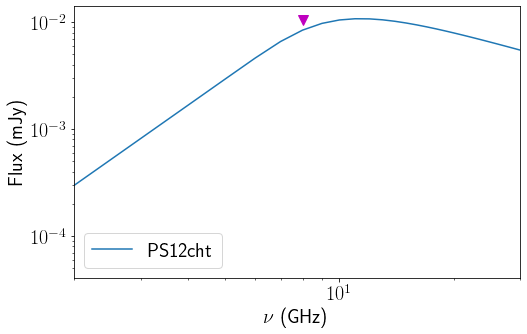

In [14]:
#PS1-12cht
#Synchrotron model of the fluxes
import numpy as np
plt.rc('text', usetex=True)

t =  948.460801393727 
t_p =  948.460801393727 #days
nu =np.arange(1, 100, dtype=float)
nu_p = 10 #GHz
F_nup = 0.0105 #mjansky 2.72E-05
m = 0.88 #using stAandard model
p = 3.0 #using standard model
a = (2*m)+0.5
b = (p+5-(6*m))/2

F_nu = F_nup*1.582*(t/t_p)**a*(nu/nu_p)**(5/2)*(1-np.exp(-(t/t_p)**(-(a+b))*(nu/nu_p)**(-(p+4)/2)))

print(F_nu)                  

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(8,5))
#plt.ylim(0.0001400,0.01570)
plt.xlim(2, 30)
plt.xscale('log')
plt.yscale('log')
ax=plt.subplot(111)
plt.plot(8,0.0105, 'mv', markersize=10) 
plt.plot(nu,F_nu, label ='PS12cht')
plt.xlabel(r'$\nu$ (GHz)', fontsize=20) #Log$_{10}$ t$_{rest}$(days)($\u03BD$ /5 GHz)', fontsize=14)
plt.ylabel('Flux (mJy)', fontsize=20) #Log$_{10}$ Luminosity (erg $s^{-1}$ $Hz^{-1}$)', fontsize =14)
plt.legend(frameon=True, framealpha=0.1, loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='lower left') #, bbox_to_anchor=(1, 0.5))
#plt.show()
plt.savefig('synPS12cht.pdf')


In [15]:
#PS12cht
#Radius at time t_p in centimeters
alpha = 1  #fraction of charged particles and magnetic field (epsilon_e/epsilon_b)
f =  0.5   # filling factor (fraction of the emiting region)
D = 707.9     # in Mpc distance to the SN

R = 4.0e14*(alpha)**(-1/19)*(f/0.5)**(-1/19)*(F_nup)**(9/19)*(D)**(18/19)*(nu_p/5)**(-1)

# Magnetic field flux
B = 1.1*(alpha)**(-4/19)*(f/0.5)**(-4/19)*(F_nup)**(-2/19)*(D)**(-4/19)*(nu_p/5)

#Internal energy of the emitting material
epsilon_b = 0.1
E = (1/epsilon_b)*((B**2)/(8* 3.142))*((4*3.142*f*R**3)/3)

#expansion velocity in km/s
v = (R/t)*1.1574e-10

#pre-explosion mass-loss in 1e-5 solar mass per year
v_w = 1000  #wind speed in km/s
M = 1.0*(alpha)**(-8/19)*epsilon_b*(f)**(-8/19)*(F_nup)**(-4/19)*(D)**(-4/19)*(nu_p/5)*(t_p/10)*(v_w/1000)

print (R)
print (B)
print(E)
print(v)
print(M)


1.1579025267510604e+16
0.892738896377307
1.03105937014855e+48
1412.9802544210247
16.649319750422574


[8.75476570e-05 4.95244336e-04 1.36473291e-03 2.80152502e-03
 4.89400308e-03 7.70051032e-03 1.10017937e-02 1.40629021e-02
 1.62635275e-02 1.75002577e-02 1.79698649e-02 1.79220138e-02
 1.75587851e-02 1.70196349e-02 1.63937580e-02 1.57357279e-02
 1.50777940e-02 1.44382699e-02 1.38269277e-02 1.32483749e-02
 1.27041435e-02 1.21939741e-02 1.17166032e-02 1.12702429e-02
 1.08528716e-02 1.04624071e-02 1.00968073e-02 9.75412597e-03
 9.43254119e-03 9.13036655e-03 8.84605276e-03 8.57818322e-03
 8.32546653e-03 8.08672744e-03 7.86089729e-03 7.64700453e-03
 7.44416562e-03 7.25157661e-03 7.06850529e-03 6.89428414e-03
 6.72830385e-03 6.57000760e-03 6.41888582e-03 6.27447157e-03
 6.13633640e-03 6.00408659e-03 5.87735988e-03 5.75582244e-03
 5.63916631e-03 5.52710691e-03 5.41938102e-03 5.31574477e-03
 5.21597199e-03 5.11985267e-03 5.02719153e-03 4.93780680e-03
 4.85152909e-03 4.76820034e-03 4.68767296e-03 4.60980894e-03
 4.53447909e-03 4.46156241e-03 4.39094538e-03 4.32252148e-03
 4.25619060e-03 4.191858

/usr/lib/python3/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


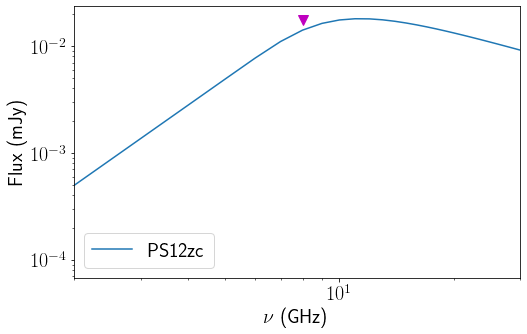

In [16]:
#PS12zc
#Synchrotron model of the fluxes
import numpy as np
plt.rc('text', usetex=True)

t =1091.92948586118
t_p = 1091.92948586118 #days
nu =np.arange(1, 100, dtype=float)
nu_p = 10 #GHz
F_nup = 0.0175 #mjansky 
m = 0.88 #using stAandard model
p = 3.0 #using standard model
a = (2*m)+0.5
b = (p+5-(6*m))/2

F_nu = F_nup*1.582*(t/t_p)**a*(nu/nu_p)**(5/2)*(1-np.exp(-(t/t_p)**(-(a+b))*(nu/nu_p)**(-(p+4)/2)))

print(F_nu)                  

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(8,5))
#plt.ylim(0.0001400,0.01570)
plt.xlim(2, 30)
plt.xscale('log')
plt.yscale('log')
ax=plt.subplot(111)
plt.plot(8,0.0175, 'mv', markersize=10) 
plt.plot(nu,F_nu, label ='PS12zc')
plt.xlabel(r'$\nu$ (GHz)', fontsize=20) #Log$_{10}$ t$_{rest}$(days)($\u03BD$ /5 GHz)', fontsize=14)
plt.ylabel('Flux (mJy)', fontsize=20) #Log$_{10}$ Luminosity (erg $s^{-1}$ $Hz^{-1}$)', fontsize =14)
plt.legend(frameon=True, framealpha=0.1, loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='lower left') #, bbox_to_anchor=(1, 0.5))
#plt.show()
plt.savefig('synPS12zc.pdf')


In [17]:
#PS12zc
#Radius at time t_p in centimeters
alpha = 1  #fraction of charged particles and magnetic field (epsilon_e/epsilon_b)
f =  0.5   # filling factor (fraction of the emiting region)
D =  808.4  # in Mpc distance to the SN

R = 4.0e14*(alpha)**(-1/19)*(f/0.5)**(-1/19)*(F_nup)**(9/19)*(D)**(18/19)*(nu_p/5)**(-1)

# Magnetic field flux
B = 1.1*(alpha)**(-4/19)*(f/0.5)**(-4/19)*(F_nup)**(-2/19)*(D)**(-4/19)*(nu_p/5)

#Internal energy of the emitting material
epsilon_b = 0.1
E = (1/epsilon_b)*((B**2)/(8* 3.142))*((4*3.142*f*R**3)/3)

#expansion velocity in km/s
v = (R/t)*1.1574e-10

#pre-explosion mass-loss in 1e-5 solar mass per year
v_w = 1000  #wind speed in km/s
M = 1.0*(alpha)**(-8/19)*epsilon_b*(f)**(-8/19)*(F_nup)**(-4/19)*(D)**(-4/19)*(nu_p/5)*(t_p/10)*(v_w/1000)

print (R)
print (B)
print(E)
print(v)
print(M)




1.6725465055246052e+16
0.8226861585027087
2.638892760385153e+48
1772.8299771733452
16.738977826099042


[5.90321344e-05 3.33936181e-04 9.20219905e-04 1.88902830e-03
 3.29995636e-03 5.19234410e-03 7.41835232e-03 9.48241396e-03
 1.09662643e-02 1.18001737e-02 1.21168232e-02 1.20845579e-02
 1.18396379e-02 1.14760967e-02 1.10540768e-02 1.06103765e-02
 1.01667411e-02 9.73551913e-03 9.32329979e-03 8.93318993e-03
 8.56622248e-03 8.22222257e-03 7.90033817e-03 7.59936379e-03
 7.31793627e-03 7.05465162e-03 6.80813289e-03 6.57706779e-03
 6.36022777e-03 6.15647573e-03 5.96476700e-03 5.78414640e-03
 5.61374314e-03 5.45276479e-03 5.30049075e-03 5.15626591e-03
 5.01949453e-03 4.88963451e-03 4.76619214e-03 4.64871730e-03
 4.53679917e-03 4.43006226e-03 4.32816301e-03 4.23078655e-03
 4.13764397e-03 4.04846982e-03 3.96301980e-03 3.88106885e-03
 3.80240928e-03 3.72684923e-03 3.65421120e-03 3.58433076e-03
 3.51705540e-03 3.45224352e-03 3.38976343e-03 3.32949259e-03
 3.27131676e-03 3.21512937e-03 3.16083091e-03 3.10832831e-03
 3.05753447e-03 3.00836779e-03 2.96075174e-03 2.91461449e-03
 2.86988852e-03 2.826510

/usr/lib/python3/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


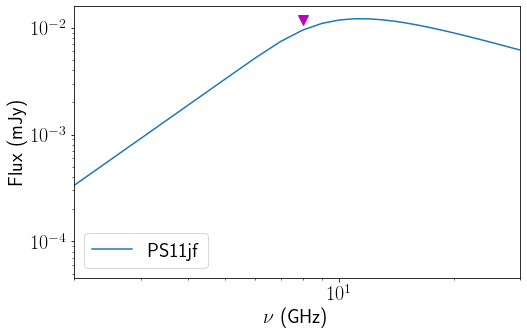

In [18]:
#PS11jf

#Synchrotron model of the fluxes
import numpy as np
plt.rc('text', usetex=True)

t =1338.751950078
t_p = 1338.751950078 #days
nu =np.arange(1, 100, dtype=float)
nu_p = 10 #GHz
F_nup = 0.0118  #mjansky 2.72E-05
m = 0.88 #using stAandard model
p = 3.0 #using standard model
a = (2*m)+0.5
b = (p+5-(6*m))/2

F_nu = F_nup*1.582*(t/t_p)**a*(nu/nu_p)**(5/2)*(1-np.exp(-(t/t_p)**(-(a+b))*(nu/nu_p)**(-(p+4)/2)))

print(F_nu)                  

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(8,5))
#plt.ylim(0.0001400,0.01570)
plt.xlim(2, 30)
plt.xscale('log')
plt.yscale('log')
ax=plt.subplot(111)
plt.plot(8,0.0118, 'mv', markersize=10) 
plt.plot(nu,F_nu, label ='PS11jf')
plt.xlabel(r'$\nu$ (GHz)', fontsize=20) #Log$_{10}$ t$_{rest}$(days)($\u03BD$ /5 GHz)', fontsize=14)
plt.ylabel('Flux (mJy)', fontsize=20) #Log$_{10}$ Luminosity (erg $s^{-1}$ $Hz^{-1}$)', fontsize =14)
plt.legend(frameon=True, framealpha=0.1, loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='lower left') #, bbox_to_anchor=(1, 0.5))
#plt.show()
plt.savefig('synPS11jf.pdf')

In [19]:
#PS11jf

#Radius at time t_p in centimeters
alpha = 1  #fraction of charged particles and magnetic field (epsilon_e/epsilon_b)
f =  0.5   # filling factor (fraction of the emiting region)
D =   1458.5   # in Mpc distance to the SN

R = 4.0e14*(alpha)**(-1/19)*(f/0.5)**(-1/19)*(F_nup)**(9/19)*(D)**(18/19)*(nu_p/5)**(-1)

# Magnetic field flux
B = 1.1*(alpha)**(-4/19)*(f/0.5)**(-4/19)*(F_nup)**(-2/19)*(D)**(-4/19)*(nu_p/5)

#Internal energy of the emitting material
epsilon_b = 0.1
E = (1/epsilon_b)*((B**2)/(8* 3.142))*((4*3.142*f*R**3)/3)

#expansion velocity in km/s
v = (R/t)*1.1574e-10

#pre-explosion mass-loss in 1e-5 solar mass per year
v_w = 1000  #wind speed in km/s
M = 1.0*(alpha)**(-8/19)*epsilon_b*(f)**(-8/19)*(F_nup)**(-4/19)*(D)**(-4/19)*(nu_p/5)*(t_p/10)*(v_w/1000)

print (R)
print (B)
print(E)
print(v)
print(M)


2.427146489028702e+16
0.757350479278497
6.834402138994308e+48
2098.3568660633123
19.693077791067783


[5.40294112e-05 3.05636504e-04 8.42235168e-04 1.72894116e-03
 3.02029904e-03 4.75231494e-03 6.78967840e-03 8.67881956e-03
 1.00369198e-02 1.08001590e-02 1.10899738e-02 1.10604428e-02
 1.08362788e-02 1.05035461e-02 1.01172906e-02 9.71119206e-03
 9.30515286e-03 8.91047514e-03 8.53318964e-03 8.17613994e-03
 7.84027142e-03 7.52542404e-03 7.23081799e-03 6.95534991e-03
 6.69777218e-03 6.45679979e-03 6.23117248e-03 6.01968917e-03
 5.82122542e-03 5.63474050e-03 5.45927827e-03 5.29396450e-03
 5.13800220e-03 4.99066608e-03 4.85129662e-03 4.71929422e-03
 4.59411364e-03 4.47525871e-03 4.36227755e-03 4.25475821e-03
 4.15232466e-03 4.05463326e-03 3.96136953e-03 3.87224531e-03
 3.78699618e-03 3.70537915e-03 3.62717067e-03 3.55216471e-03
 3.48017121e-03 3.41101455e-03 3.34453228e-03 3.28057391e-03
 3.21899986e-03 3.15968051e-03 3.10249535e-03 3.04733220e-03
 2.99408652e-03 2.94266078e-03 2.89296389e-03 2.84491066e-03
 2.79842138e-03 2.75342137e-03 2.70984058e-03 2.66761326e-03
 2.62667763e-03 2.586975

/usr/lib/python3/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


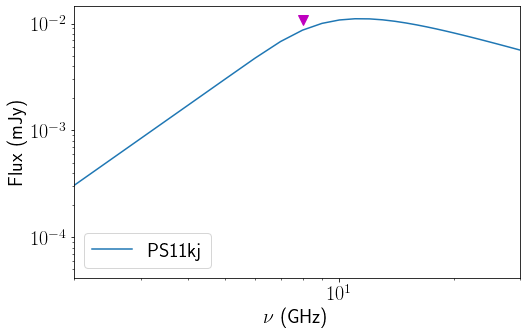

In [20]:
#PS11kj

#Synchrotron model of the fluxes
import numpy as np
plt.rc('text', usetex=True)

t = 1170.95
t_p = 1170.95 #days
nu =np.arange(1, 100, dtype=float)
nu_p = 10 #GHz
F_nup = 0.0108 #mjansky 2.72E-05
m = 0.88 #using stAandard model
p = 3.0 #using standard model
a = (2*m)+0.5
b = (p+5-(6*m))/2

F_nu = F_nup*1.582*(t/t_p)**a*(nu/nu_p)**(5/2)*(1-np.exp(-(t/t_p)**(-(a+b))*(nu/nu_p)**(-(p+4)/2)))

print(F_nu)                  

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(8,5))
#plt.ylim(0.0001400,0.01570)
plt.xlim(2, 30)
plt.xscale('log')
plt.yscale('log')
ax=plt.subplot(111)
plt.plot(8, 0.0108, 'mv', markersize=10) 
plt.plot(nu,F_nu, label ='PS11kj')
plt.xlabel(r'$\nu$ (GHz)', fontsize=20) #Log$_{10}$ t$_{rest}$(days)($\u03BD$ /5 GHz)', fontsize=14)
plt.ylabel('Flux (mJy)', fontsize=20) #Log$_{10}$ Luminosity (erg $s^{-1}$ $Hz^{-1}$)', fontsize =14)
plt.legend(frameon=True, framealpha=0.1, loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='lower left')# bbox_to_anchor=(1, 0.5))
#plt.show()
plt.savefig('synPS11kj.pdf')

In [21]:
#PS11kj

#Radius at time t_p in centimeters
alpha = 1  #fraction of charged particles and magnetic field (epsilon_e/epsilon_b)
f =  0.5   # filling factor (fraction of the emiting region)
D =    2193.4  # in Mpc distance to the SN

R = 4.0e14*(alpha)**(-1/19)*(f/0.5)**(-1/19)*(F_nup)**(9/19)*(D)**(18/19)*(nu_p/5)**(-1)

# Magnetic field flux
B = 1.1*(alpha)**(-4/19)*(f/0.5)**(-4/19)*(F_nup)**(-2/19)*(D)**(-4/19)*(nu_p/5)

#Internal energy of the emitting material
epsilon_b = 0.1
E = (1/epsilon_b)*((B**2)/(8* 3.142))*((4*3.142*f*R**3)/3)

#expansion velocity in km/s
v = (R/t)*1.1574e-10

#pre-explosion mass-loss in 1e-5 solar mass per year
v_w = 1000  #wind speed in km/s
M = 1.0*(alpha)**(-8/19)*epsilon_b*(f)**(-8/19)*(F_nup)**(-4/19)*(D)**(-4/19)*(nu_p/5)*(t_p/10)*(v_w/1000)

print (R)
print (B)
print(E)
print(v)
print(M)


3.4258110957359844e+16
0.7015158328370082
1.648860611052672e+49
3386.168292587069
16.104255072136215


[8.20446614e-05 4.64114692e-04 1.27894970e-03 2.62542917e-03
 4.58638003e-03 7.21647825e-03 1.03102524e-02 1.31789482e-02
 1.52412486e-02 1.64002415e-02 1.68403306e-02 1.67954872e-02
 1.64550900e-02 1.59498293e-02 1.53632932e-02 1.47466250e-02
 1.41300469e-02 1.35307215e-02 1.29578065e-02 1.24156199e-02
 1.19055973e-02 1.14274958e-02 1.09801310e-02 1.05618276e-02
 1.01706911e-02 9.80477005e-03 9.46215080e-03 9.14100948e-03
 8.83963860e-03 8.55645780e-03 8.29001516e-03 8.03898313e-03
 7.80215149e-03 7.57841886e-03 7.36678375e-03 7.16633567e-03
 6.97624664e-03 6.79576322e-03 6.62419925e-03 6.46092913e-03
 6.30538189e-03 6.15703569e-03 6.01541299e-03 5.88007622e-03
 5.75062383e-03 5.62668686e-03 5.50792583e-03 5.39402789e-03
 5.28470443e-03 5.17968877e-03 5.07873421e-03 4.98161224e-03
 4.88811090e-03 4.79803336e-03 4.71119664e-03 4.62743038e-03
 4.54657583e-03 4.46848489e-03 4.39301923e-03 4.32004952e-03
 4.24945469e-03 4.18112134e-03 4.11494310e-03 4.05082013e-03
 3.98865862e-03 3.928370

/usr/lib/python3/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


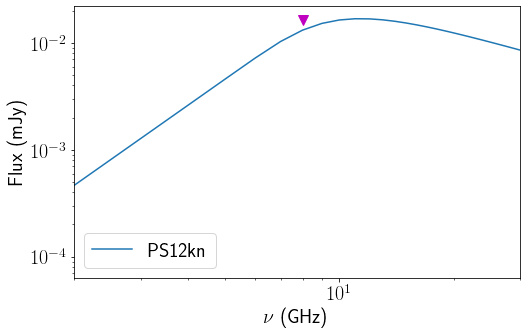

In [22]:
#PS12kn

#Synchrotron model of the fluxes
import numpy as np
plt.rc('text', usetex=True)

t = 907.163041412084 
t_p = 907.163041412084 #days
nu =np.arange(1, 100, dtype=float)
nu_p = 10 #GHz
F_nup = 0.0164  #mjansky 2.72E-05
m = 0.88 #using stAandard model
p = 3.0 #using standard model
a = (2*m)+0.5
b = (p+5-(6*m))/2

F_nu = F_nup*1.582*(t/t_p)**a*(nu/nu_p)**(5/2)*(1-np.exp(-(t/t_p)**(-(a+b))*(nu/nu_p)**(-(p+4)/2)))

print(F_nu)                  

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(8,5))
#plt.ylim(0.0001400,0.01570)
plt.xlim(2, 30)
plt.xscale('log')
plt.yscale('log')
ax=plt.subplot(111)
plt.plot(8,0.0164, 'mv', markersize=10) 
plt.plot(nu,F_nu, label ='PS12kn')
plt.xlabel(r'$\nu$ (GHz)', fontsize=20) #Log$_{10}$ t$_{rest}$(days)($\u03BD$ /5 GHz)', fontsize=14)
plt.ylabel('Flux (mJy)', fontsize=20) #Log$_{10}$ Luminosity (erg $s^{-1}$ $Hz^{-1}$)', fontsize =14)
plt.legend(frameon=True, framealpha=0.1, loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='lower left')#, bbox_to_anchor=(1, 0.5))
#plt.show()
plt.savefig('synPS12kn.pdf')

In [23]:
#PS12kn

#Radius at time t_p in centimeters
alpha = 1  #fraction of charged particles and magnetic field (epsilon_e/epsilon_b)
f =  0.5   # filling factor (fraction of the emiting region)
D =  2678.3   # in Mpc distance to the SN

R = 4.0e14*(alpha)**(-1/19)*(f/0.5)**(-1/19)*(F_nup)**(9/19)*(D)**(18/19)*(nu_p/5)**(-1)

# Magnetic field flux
B = 1.1*(alpha)**(-4/19)*(f/0.5)**(-4/19)*(F_nup)**(-2/19)*(D)**(-4/19)*(nu_p/5)

#Internal energy of the emitting material
epsilon_b = 0.1
E = (1/epsilon_b)*((B**2)/(8* 3.142))*((4*3.142*f*R**3)/3)

#expansion velocity in km/s
v = (R/t)*1.1574e-10

#pre-explosion mass-loss in 1e-5 solar mass per year
v_w = 1000  #wind speed in km/s
M = 1.0*(alpha)**(-8/19)*epsilon_b*(f)**(-8/19)*(F_nup)**(-4/19)*(D)**(-4/19)*(nu_p/5)*(t_p/10)*(v_w/1000)

print (R)
print (B)
print(E)
print(v)
print(M)


5.045164036048345e+16
0.6436937343994084
4.434076598839553e+49
6436.850476440245
10.955509777288695


[5.15280496e-05 2.91486666e-04 8.03242799e-04 1.64889759e-03
 2.88047038e-03 4.53230036e-03 6.47534143e-03 8.27702235e-03
 9.57224763e-03 1.03001517e-02 1.05765491e-02 1.05483852e-02
 1.03345992e-02 1.00172708e-02 9.64889754e-03 9.26159984e-03
 8.87435875e-03 8.49795314e-03 8.13813457e-03 7.79761494e-03
 7.47729589e-03 7.17702478e-03 6.89605789e-03 6.63334297e-03
 6.38769013e-03 6.15787387e-03 5.94269227e-03 5.74099985e-03
 5.55172424e-03 5.37387288e-03 5.20653391e-03 5.04887355e-03
 4.90013173e-03 4.75961672e-03 4.62669955e-03 4.50080838e-03
 4.38142320e-03 4.26807080e-03 4.16032026e-03 4.05777866e-03
 3.96008741e-03 3.86691876e-03 3.77797279e-03 3.69297470e-03
 3.61167228e-03 3.53383382e-03 3.45924610e-03 3.38771264e-03
 3.31905217e-03 3.25309721e-03 3.18969283e-03 3.12869549e-03
 3.06997209e-03 3.01339900e-03 2.95886130e-03 2.90625200e-03
 2.85547140e-03 2.80642649e-03 2.75903037e-03 2.71320183e-03
 2.66886484e-03 2.62594816e-03 2.58438500e-03 2.54411265e-03
 2.50507218e-03 2.467208

/usr/lib/python3/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


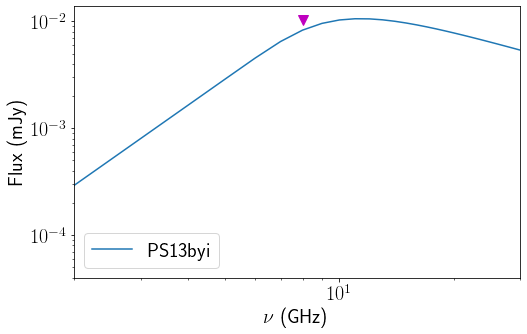

In [24]:
#PS13byi

#Synchrotron model of the fluxes
import numpy as np
plt.rc('text', usetex=True)

t =510.88991082045 
t_p = 510.88991082045 #days
nu =np.arange(1, 100, dtype=float)
nu_p = 10 #GHz
F_nup = 0.0103 #mjansky 2.72E-05
m = 0.88 #using stAandard model
p = 3.0 #using standard model
a = (2*m)+0.5
b = (p+5-(6*m))/2

F_nu = F_nup*1.582*(t/t_p)**a*(nu/nu_p)**(5/2)*(1-np.exp(-(t/t_p)**(-(a+b))*(nu/nu_p)**(-(p+4)/2)))

print(F_nu)                  

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(8,5))
#plt.ylim(0.0001400,0.01570)
plt.xlim(2, 30)
plt.xscale('log')
plt.yscale('log')
ax=plt.subplot(111)
plt.plot(8,0.0103, 'mv', markersize=10) 
plt.plot(nu,F_nu, label ='PS13byi')
plt.xlabel(r'$\nu$ (GHz)', fontsize=20) #Log$_{10}$ t$_{rest}$(days)($\u03BD$ /5 GHz)', fontsize=14)
plt.ylabel('Flux (mJy)', fontsize=20) #Log$_{10}$ Luminosity (erg $s^{-1}$ $Hz^{-1}$)', fontsize =14)
plt.legend(frameon=True, framealpha=0.1, loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='lower left')# bbox_to_anchor=(1, 0.5))
#plt.show()
plt.savefig('synPS13byi.pdf')

In [25]:
#PS13byi

#Radius at time t_p in centimeters
alpha = 1  #fraction of charged particles and magnetic field (epsilon_e/epsilon_b)
f =  0.5   # filling factor (fraction of the emiting region)
D =  4176.1   # in Mpc distance to the SN

R = 4.0e14*(alpha)**(-1/19)*(f/0.5)**(-1/19)*(F_nup)**(9/19)*(D)**(18/19)*(nu_p/5)**(-1)

# Magnetic field flux
B = 1.1*(alpha)**(-4/19)*(f/0.5)**(-4/19)*(F_nup)**(-2/19)*(D)**(-4/19)*(nu_p/5)

#Internal energy of the emitting material
epsilon_b = 0.1
E = (1/epsilon_b)*((B**2)/(8* 3.142))*((4*3.142*f*R**3)/3)

#expansion velocity in km/s
v = (R/t)*1.1574e-10

#pre-explosion mass-loss in 1e-5 solar mass per year
v_w = 1000  #wind speed in km/s
M = 1.0*(alpha)**(-8/19)*epsilon_b*(f)**(-8/19)*(F_nup)**(-4/19)*(D)**(-4/19)*(nu_p/5)*(t_p/10)*(v_w/1000)

print (R)
print (B)
print(E)
print(v)
print(M)


6.165188589872019e+16
0.6156447128202579
7.401473014371388e+49
13966.980209999972
6.197111297684444


[0.00010556 0.00059712 0.00164548 0.00337784 0.00590077 0.00928462
 0.01326502 0.01695584 0.01960917 0.02110031 0.02166652 0.02160883
 0.02117088 0.02052082 0.01976619 0.01897279 0.01817951 0.01740843
 0.01667132 0.01597375 0.01531757 0.01470245 0.01412688 0.01358869
 0.01308546 0.01261467 0.01217386 0.01176069 0.01137295 0.01100861
 0.01066581 0.01034284 0.01003813 0.00975028 0.009478   0.0092201
 0.00897554 0.00874333 0.0085226  0.00831254 0.00811241 0.00792155
 0.00773934 0.00756522 0.00739867 0.00723921 0.00708642 0.00693988
 0.00679922 0.00666411 0.00653423 0.00640927 0.00628897 0.00617308
 0.00606136 0.00595358 0.00584956 0.00574909 0.00565199 0.00555811
 0.00546729 0.00537937 0.00529423 0.00521173 0.00513175 0.00505418
 0.00497892 0.00490586 0.00483491 0.00476597 0.00469897 0.00463383
 0.00457046 0.00450879 0.00444877 0.00439032 0.00433338 0.0042779
 0.00422382 0.00417108 0.00411965 0.00406947 0.00402049 0.00397268
 0.00392599 0.00388038 0.00383582 0.00379227 0.00374969 0.003708

/usr/lib/python3/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


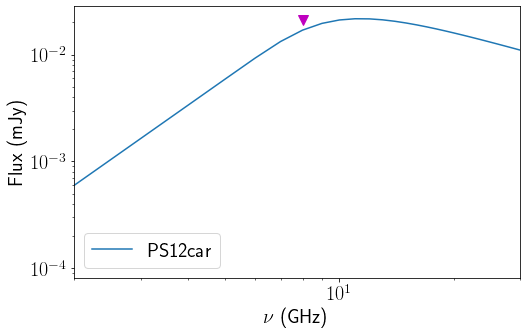

In [26]:
#PS12car

#Synchrotron model of the fluxes
import numpy as np
plt.rc('text', usetex=True)

t =656.602916666664 
t_p = 656.602916666664 #days
nu =np.arange(1, 100, dtype=float)
nu_p = 10 #GHz
F_nup = 0.0211  #mjansky 2.72E-05
m = 0.88 #using stAandard model
p = 3.0 #using standard model
a = (2*m)+0.5
b = (p+5-(6*m))/2

F_nu = F_nup*1.582*(t/t_p)**a*(nu/nu_p)**(5/2)*(1-np.exp(-(t/t_p)**(-(a+b))*(nu/nu_p)**(-(p+4)/2)))

print(F_nu)                  

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(8,5))
#plt.ylim(0.0001400,0.01570)
plt.xlim(2, 30)
plt.xscale('log')
plt.yscale('log')
ax=plt.subplot(111)
plt.plot(8,0.0211, 'mv', markersize=10) 
plt.plot(nu,F_nu, label ='PS12car')
plt.xlabel(r'$\nu$ (GHz)', fontsize=20) #Log$_{10}$ t$_{rest}$(days)($\u03BD$ /5 GHz)', fontsize=14)
plt.ylabel('Flux (mJy)', fontsize=20) #Log$_{10}$ Luminosity (erg $s^{-1}$ $Hz^{-1}$)', fontsize =14)
plt.legend(frameon=True, framealpha=0.1, loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='lower left')# bbox_to_anchor=(1, 0.5))
#plt.show()
plt.savefig('synPS12car.pdf')

In [27]:
#PS12car

#Radius at time t_p in centimeters
alpha = 1  #fraction of charged particles and magnetic field (epsilon_e/epsilon_b)
f =  0.5   # filling factor (fraction of the emiting region)
D =  4161.1   # in Mpc distance to the SN

R = 4.0e14*(alpha)**(-1/19)*(f/0.5)**(-1/19)*(F_nup)**(9/19)*(D)**(18/19)*(nu_p/5)**(-1)

# Magnetic field flux
B = 1.1*(alpha)**(-4/19)*(f/0.5)**(-4/19)*(F_nup)**(-2/19)*(D)**(-4/19)*(nu_p/5)

#Internal energy of the emitting material
epsilon_b = 0.1
E = (1/epsilon_b)*((B**2)/(8* 3.142))*((4*3.142*f*R**3)/3)

#expansion velocity in km/s
v = (R/t)*1.1574e-10

#pre-explosion mass-loss in 1e-5 solar mass per year
v_w = 1000  #wind speed in km/s
M = 1.0*(alpha)**(-8/19)*epsilon_b*(f)**(-8/19)*(F_nup)**(-4/19)*(D)**(-4/19)*(nu_p/5)*(t_p/10)*(v_w/1000)

print (R)
print (B)
print(E)
print(v)
print(M)


8.629637773965946e+16
0.5713147580780533
1.748023793391361e+50
15211.541871140882
6.853719994481917


[4.41240191e-05 2.49603145e-04 6.87825387e-04 1.41196861e-03
 2.46657755e-03 3.88105720e-03 5.54490402e-03 7.08770264e-03
 8.19681787e-03 8.82012987e-03 9.05681192e-03 9.03269494e-03
 8.84962767e-03 8.57789598e-03 8.26245401e-03 7.93080685e-03
 7.59920817e-03 7.27688803e-03 6.96877154e-03 6.67718095e-03
 6.40288833e-03 6.14576297e-03 5.90516802e-03 5.68020242e-03
 5.46984728e-03 5.27305316e-03 5.08879086e-03 4.91607949e-03
 4.75400076e-03 4.60170474e-03 4.45841059e-03 4.32340434e-03
 4.19603513e-03 4.07571063e-03 3.96189224e-03 3.85409028e-03
 3.75185947e-03 3.65479461e-03 3.56252667e-03 3.47471920e-03
 3.39106514e-03 3.31128383e-03 3.23511845e-03 3.16233367e-03
 3.09271355e-03 3.02605964e-03 2.96218938e-03 2.90093451e-03
 2.84213982e-03 2.78566189e-03 2.73136803e-03 2.67913536e-03
 2.62884988e-03 2.58040575e-03 2.53370453e-03 2.48865463e-03
 2.44517066e-03 2.40317297e-03 2.36258717e-03 2.32334370e-03
 2.28537746e-03 2.24862745e-03 2.21303647e-03 2.17855083e-03
 2.14512006e-03 2.112696

/usr/lib/python3/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


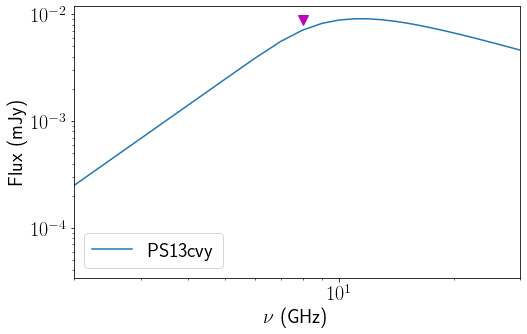

In [28]:
#PS13cvy

#Synchrotron model of the fluxes
import numpy as np
plt.rc('text', usetex=True)

t =445.840280898879
t_p =  445.840280898879 #days
nu =np.arange(1, 100, dtype=float)
nu_p = 10 #GHz
F_nup = 0.00882 #mjansky 2.72E-05
m = 0.88 #using stAandard model
p = 3.0 #using standard model
a = (2*m)+0.5
b = (p+5-(6*m))/2

F_nu = F_nup*1.582*(t/t_p)**a*(nu/nu_p)**(5/2)*(1-np.exp(-(t/t_p)**(-(a+b))*(nu/nu_p)**(-(p+4)/2)))

print(F_nu)                  

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(8,5))
#plt.ylim(0.0001400,0.01570)
plt.xlim(2, 30)
plt.xscale('log')
plt.yscale('log')
ax=plt.subplot(111)
plt.plot(8,0.00882, 'mv', markersize=10) 
plt.plot(nu,F_nu, label ='PS13cvy')
plt.xlabel(r'$\nu$ (GHz)', fontsize=20) #Log$_{10}$ t$_{rest}$(days)($\u03BD$ /5 GHz)', fontsize=14)
plt.ylabel('Flux (mJy)', fontsize=20) #Log$_{10}$ Luminosity (erg $s^{-1}$ $Hz^{-1}$)', fontsize =14)
plt.legend(frameon=True, framealpha=0.1, loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='lower left')#, bbox_to_anchor=(1, 0.5))
#plt.show()
plt.savefig('synPS13cvy.pdf')

In [29]:
#PS13cvy

#Radius at time t_p in centimeters
alpha = 1  #fraction of charged particles and magnetic field (epsilon_e/epsilon_b)
f =  0.5   # filling factor (fraction of the emiting region)
D =  4926.3    # in Mpc distance to the SN

R = 4.0e14*(alpha)**(-1/19)*(f/0.5)**(-1/19)*(F_nup)**(9/19)*(D)**(18/19)*(nu_p/5)**(-1)

# Magnetic field flux
B = 1.1*(alpha)**(-4/19)*(f/0.5)**(-4/19)*(F_nup)**(-2/19)*(D)**(-4/19)*(nu_p/5)

#Internal energy of the emitting material
epsilon_b = 0.1
E = (1/epsilon_b)*((B**2)/(8* 3.142))*((4*3.142*f*R**3)/3)

#expansion velocity in km/s
v = (R/t)*1.1574e-10

#pre-explosion mass-loss in 1e-5 solar mass per year
v_w = 1000  #wind speed in km/s
M = 1.0*(alpha)**(-8/19)*epsilon_b*(f)**(-8/19)*(F_nup)**(-4/19)*(D)**(-4/19)*(nu_p/5)*(t_p/10)*(v_w/1000)

print (R)
print (B)
print(E)
print(v)
print(M)


6.698978088729457e+16
0.6043886970390766
9.151179906674969e+49
17390.526545209184
5.396583347300322


[8.15443891e-05 4.61284724e-04 1.27115123e-03 2.60942045e-03
 4.55841430e-03 7.17247533e-03 1.02473850e-02 1.30985888e-02
 1.51483142e-02 1.63002400e-02 1.67376456e-02 1.66930757e-02
 1.63547541e-02 1.58525742e-02 1.52696146e-02 1.46567065e-02
 1.40438881e-02 1.34482171e-02 1.28787955e-02 1.23399149e-02
 1.18330022e-02 1.13578159e-02 1.09131790e-02 1.04974262e-02
 1.01086747e-02 9.74498487e-03 9.40445476e-03 9.08527161e-03
 8.78573836e-03 8.50428427e-03 8.23946628e-03 7.98996494e-03
 7.75457739e-03 7.53220899e-03 7.32186434e-03 7.12263851e-03
 6.93370855e-03 6.75432564e-03 6.58380779e-03 6.42153322e-03
 6.26693444e-03 6.11949279e-03 5.97873365e-03 5.84422209e-03
 5.71555905e-03 5.59237780e-03 5.47434091e-03 5.36113748e-03
 5.25248062e-03 5.14810530e-03 5.04776632e-03 4.95123655e-03
 4.85830534e-03 4.76877706e-03 4.68246983e-03 4.59921434e-03
 4.51885281e-03 4.44123803e-03 4.36623253e-03 4.29370775e-03
 4.22354338e-03 4.15562670e-03 4.08985199e-03 4.02612001e-03
 3.96433753e-03 3.904416

/usr/lib/python3/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


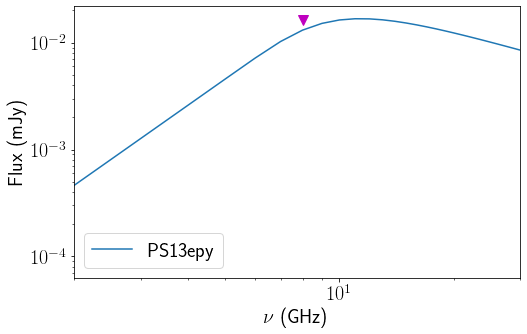

In [30]:
#PS13epy

#Synchrotron model of the fluxes
import numpy as np
plt.rc('text', usetex=True)

t = 529.994590417312 
t_p = 529.994590417312 #days
nu =np.arange(1, 100, dtype=float)
nu_p = 10 #GHz
F_nup = 0.0163 #mjansky 2.72E-05
m = 0.88 #using stAandard model
p = 3.0 #using standard model
a = (2*m)+0.5
b = (p+5-(6*m))/2

F_nu = F_nup*1.582*(t/t_p)**a*(nu/nu_p)**(5/2)*(1-np.exp(-(t/t_p)**(-(a+b))*(nu/nu_p)**(-(p+4)/2)))

print(F_nu)                  

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(8,5))
#plt.ylim(0.0001400,0.01570)
plt.xlim(2, 30)
plt.xscale('log')
plt.yscale('log')
ax=plt.subplot(111)
plt.plot(8,0.0163, 'mv', markersize=10) 
plt.plot(nu,F_nu, label ='PS13epy')
plt.xlabel(r'$\nu$ (GHz)', fontsize=20) #Log$_{10}$ t$_{rest}$(days)($\u03BD$ /5 GHz)', fontsize=14)
plt.ylabel('Flux (mJy)', fontsize=20) #Log$_{10}$ Luminosity (erg $s^{-1}$ $Hz^{-1}$)', fontsize =14)
plt.legend(frameon=True, framealpha=0.1, loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='lower left')#, bbox_to_anchor=(1, 0.5))
#plt.show()
plt.savefig('synPS13epy.pdf')

In [31]:
#PS13epy

#Radius at time t_p in centimeters
alpha = 1  #fraction of charged particles and magnetic field (epsilon_e/epsilon_b)
f =  0.5   # filling factor (fraction of the emiting region)
D =  1530.3   # in Mpc distance to the SN

R = 4.0e14*(alpha)**(-1/19)*(f/0.5)**(-1/19)*(F_nup)**(9/19)*(D)**(18/19)*(nu_p/5)**(-1)

# Magnetic field flux
B = 1.1*(alpha)**(-4/19)*(f/0.5)**(-4/19)*(F_nup)**(-2/19)*(D)**(-4/19)*(nu_p/5)

#Internal energy of the emitting material
epsilon_b = 0.1
E = (1/epsilon_b)*((B**2)/(8* 3.142))*((4*3.142*f*R**3)/3)

#expansion velocity in km/s
v = (R/t)*1.1574e-10

#pre-explosion mass-loss in 1e-5 solar mass per year
v_w = 1000  #wind speed in km/s
M = 1.0*(alpha)**(-8/19)*epsilon_b*(f)**(-8/19)*(F_nup)**(-4/19)*(D)**(-4/19)*(nu_p/5)*(t_p/10)*(v_w/1000)

print (R)
print (B)
print(E)
print(v)
print(M)


2.9602490528349172e+16
0.7246598164740452
1.135198649508366e+49
6464.5796687347065
7.21029745732153


[0.00010406 0.00058863 0.00162208 0.00332981 0.00581687 0.00915261
 0.01307642 0.01671476 0.01933036 0.02080031 0.02135847 0.02130159
 0.02086987 0.02022905 0.01948515 0.01870304 0.01792104 0.01716092
 0.01643429 0.01574664 0.01509978 0.01449341 0.01392602 0.01339549
 0.01289941 0.01243532 0.01200078 0.01159348 0.01121125 0.01085209
 0.01051417 0.01019578 0.00989541 0.00961165 0.00934324 0.00908901
 0.00884792 0.00861902 0.00840142 0.00819435 0.00799707 0.00780892
 0.0076293  0.00745766 0.00729347 0.00713629 0.00698566 0.00684121
 0.00670255 0.00656936 0.00644132 0.00631814 0.00619956 0.00608531
 0.00597518 0.00586894 0.00576639 0.00566735 0.00557163 0.00547909
 0.00538955 0.00530289 0.00521895 0.00513763 0.00505879 0.00498232
 0.00490813 0.00483611 0.00476617 0.00469821 0.00463216 0.00456794
 0.00450547 0.00444469 0.00438552 0.0043279  0.00427177 0.00421708
 0.00416376 0.00411178 0.00406108 0.00401161 0.00396333 0.00391619
 0.00387017 0.00382521 0.00378128 0.00373835 0.00369638 0.0036

/usr/lib/python3/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


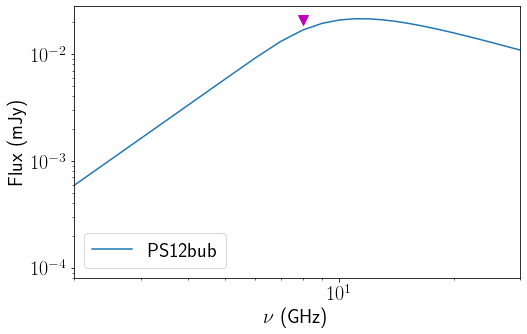

In [32]:
#PS12bub

#Synchrotron model of the fluxes
import numpy as np
plt.rc('text', usetex=True)

t =1057.25358490566
t_p = 1057.25358490566 #days
nu =np.arange(1, 100, dtype=float)
nu_p = 10 #GHz
F_nup = 0.0208 #mjansky 2.72E-05
m = 0.88 #using stAandard model
p = 3.0 #using standard model
a = (2*m)+0.5
b = (p+5-(6*m))/2

F_nu = F_nup*1.582*(t/t_p)**a*(nu/nu_p)**(5/2)*(1-np.exp(-(t/t_p)**(-(a+b))*(nu/nu_p)**(-(p+4)/2)))

print(F_nu)                  

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(8,5))
#plt.ylim(0.0001400,0.01570)
plt.xlim(2, 30)
plt.xscale('log')
plt.yscale('log')
ax=plt.subplot(111)
plt.plot(8,0.0208, 'mv', markersize=10) 
plt.plot(nu,F_nu, label ='PS12bub')
plt.xlabel(r'$\nu$ (GHz)', fontsize=20) #Log$_{10}$ t$_{rest}$(days)($\u03BD$ /5 GHz)', fontsize=14)
plt.ylabel('Flux (mJy)', fontsize=20) #Log$_{10}$ Luminosity (erg $s^{-1}$ $Hz^{-1}$)', fontsize =14)
plt.legend(frameon=True, framealpha=0.1, loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='lower left')#, bbox_to_anchor=(1, 0.5))
#plt.show()
plt.savefig('synPS12bub.pdf')

In [33]:
#PS12bub

#Radius at time t_p in centimeters
alpha = 1  #fraction of charged particles and magnetic field (epsilon_e/epsilon_b)
f =  0.5   # filling factor (fraction of the emiting region)
D =  1718.8  # in Mpc distance to the SN

R = 4.0e14*(alpha)**(-1/19)*(f/0.5)**(-1/19)*(F_nup)**(9/19)*(D)**(18/19)*(nu_p/5)**(-1)

# Magnetic field flux
B = 1.1*(alpha)**(-4/19)*(f/0.5)**(-4/19)*(F_nup)**(-2/19)*(D)**(-4/19)*(nu_p/5)

#Internal energy of the emitting material
epsilon_b = 0.1
E = (1/epsilon_b)*((B**2)/(8* 3.142))*((4*3.142*f*R**3)/3)

#expansion velocity in km/s
v = (R/t)*1.1574e-10

#pre-explosion mass-loss in 1e-5 solar mass per year
v_w = 1000  #wind speed in km/s
M = 1.0*(alpha)**(-8/19)*epsilon_b*(f)**(-8/19)*(F_nup)**(-4/19)*(D)**(-4/19)*(nu_p/5)*(t_p/10)*(v_w/1000)

print (R)
print (B)
print(E)
print(v)
print(M)


3.709142180205662e+16
0.6892369833230143
2.0201161625610483e+49
4060.4838996626336
13.333694204773513


[0.00011556 0.00065372 0.00180145 0.00369801 0.00646008 0.01016467
 0.01452237 0.01856303 0.02146786 0.02310034 0.02372022 0.02365706
 0.0231776  0.02246592 0.02163976 0.02077116 0.01990269 0.01905852
 0.01825154 0.01748785 0.01676947 0.01609605 0.01546592 0.01487672
 0.01432579 0.01381038 0.01332779 0.01287545 0.01245095 0.01205208
 0.01167679 0.0113232  0.01098962 0.01067448 0.01037638 0.01009405
 0.0098263  0.00957208 0.00933043 0.00910046 0.00888136 0.00867241
 0.00847293 0.0082823  0.00809996 0.00792539 0.00775812 0.00759769
 0.0074437  0.00729578 0.00715358 0.00701678 0.00688508 0.00675821
 0.00663589 0.0065179  0.00640402 0.00629402 0.00618773 0.00608495
 0.00598551 0.00588926 0.00579605 0.00570573 0.00561817 0.00553325
 0.00545086 0.00537087 0.00529319 0.00521772 0.00514437 0.00507305
 0.00500367 0.00493617 0.00487045 0.00480646 0.00474413 0.00468339
 0.00462418 0.00456645 0.00451014 0.0044552  0.00440158 0.00434923
 0.00429812 0.00424819 0.0041994  0.00415172 0.00410511 0.0040

/usr/lib/python3/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


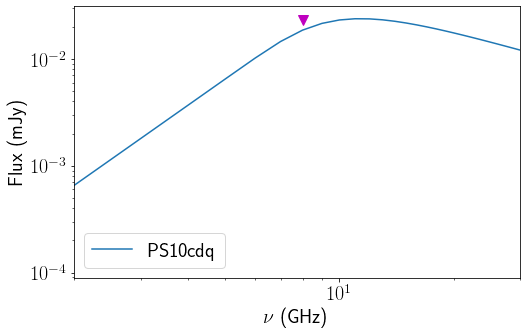

In [34]:
#PS10cdq

#Synchrotron model of the fluxes
import numpy as np
plt.rc('text', usetex=True)

t =1287.55458515284
t_p = 1287.55458515284 #days
nu =np.arange(1, 100, dtype=float)
nu_p = 10 #GHz
F_nup = 0.0231  #mjansky 2.72E-05
m = 0.88 #using stAandard model
p = 3.0 #using standard model
a = (2*m)+0.5
b = (p+5-(6*m))/2

F_nu = F_nup*1.582*(t/t_p)**a*(nu/nu_p)**(5/2)*(1-np.exp(-(t/t_p)**(-(a+b))*(nu/nu_p)**(-(p+4)/2)))

print(F_nu)                  

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(8,5))
#plt.ylim(0.0001400,0.01570)
plt.xlim(2, 30)
plt.xscale('log')
plt.yscale('log')
ax=plt.subplot(111)
plt.plot(8,0.0231, 'mv', markersize=10) 
plt.plot(nu,F_nu, label ='PS10cdq')
plt.xlabel(r'$\nu$ (GHz)', fontsize=20) #Log$_{10}$ t$_{rest}$(days)($\u03BD$ /5 GHz)', fontsize=14)
plt.ylabel('Flux (mJy)', fontsize=20) #Log$_{10}$ Luminosity (erg $s^{-1}$ $Hz^{-1}$)', fontsize =14)
plt.legend(frameon=True, framealpha=0.1, loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='lower left')#, bbox_to_anchor=(1, 0.5))
#plt.show()
plt.savefig('synPS10cdq.pdf')

In [35]:
#PS10cdq

#Radius at time t_p in centimeters
alpha = 1  #fraction of charged particles and magnetic field (epsilon_e/epsilon_b)
f =  0.5   # filling factor (fraction of the emiting region)
D =   2026.0   # in Mpc distance to the SN

R = 4.0e14*(alpha)**(-1/19)*(f/0.5)**(-1/19)*(F_nup)**(9/19)*(D)**(18/19)*(nu_p/5)**(-1)

# Magnetic field flux
B = 1.1*(alpha)**(-4/19)*(f/0.5)**(-4/19)*(F_nup)**(-2/19)*(D)**(-4/19)*(nu_p/5)

#Internal energy of the emitting material
epsilon_b = 0.1
E = (1/epsilon_b)*((B**2)/(8* 3.142))*((4*3.142*f*R**3)/3)

#expansion velocity in km/s
v = (R/t)*1.1574e-10

#pre-explosion mass-loss in 1e-5 solar mass per year
v_w = 1000  #wind speed in km/s
M = 1.0*(alpha)**(-8/19)*epsilon_b*(f)**(-8/19)*(F_nup)**(-4/19)*(D)**(-4/19)*(nu_p/5)*(t_p/10)*(v_w/1000)

print (R)
print (B)
print(E)
print(v)
print(M)


4.555170261123833e+16
0.658475214137363
3.415163197543158e+49
4094.703339974429
15.343104366867584


[5.80315898e-05 3.28276245e-04 9.04622958e-04 1.85701087e-03
 3.24402490e-03 5.10433827e-03 7.29261754e-03 9.32169508e-03
 1.07803954e-02 1.16001708e-02 1.19114533e-02 1.18797348e-02
 1.16389661e-02 1.12815865e-02 1.08667196e-02 1.04305396e-02
 9.99442344e-03 9.57051033e-03 9.16527776e-03 8.78177993e-03
 8.42103227e-03 8.08286286e-03 7.76643413e-03 7.47056101e-03
 7.19390345e-03 6.93508126e-03 6.69274081e-03 6.46559207e-03
 6.25242730e-03 6.05212869e-03 5.86366926e-03 5.68611002e-03
 5.51859495e-03 5.36034505e-03 5.21065192e-03 5.06887157e-03
 4.93441836e-03 4.80675935e-03 4.68540922e-03 4.56992548e-03
 4.45990427e-03 4.35497646e-03 4.25480431e-03 4.15907830e-03
 4.06751441e-03 3.97985168e-03 3.89584997e-03 3.81528802e-03
 3.73796167e-03 3.66368230e-03 3.59227542e-03 3.52357939e-03
 3.45744429e-03 3.39373091e-03 3.33230982e-03 3.27306051e-03
 3.21587071e-03 3.16063566e-03 3.10725751e-03 3.05564478e-03
 3.00571185e-03 2.95737851e-03 2.91056951e-03 2.86521424e-03
 2.82124634e-03 2.778603

/usr/lib/python3/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


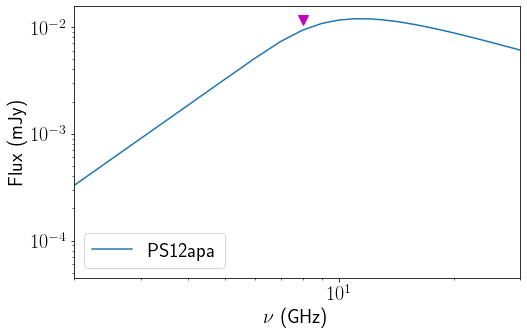

In [36]:
#PS12apa

#Synchrotron model of the fluxes
import numpy as np
plt.rc('text', usetex=True)

t =807.329842931936
t_p = 807.329842931936 #days
nu =np.arange(1, 100, dtype=float)
nu_p = 10 #GHz
F_nup = 0.0116 #mjansky 2.72E-05
m = 0.88 #using stAandard model
p = 3.0 #using standard model
a = (2*m)+0.5
b = (p+5-(6*m))/2

F_nu = F_nup*1.582*(t/t_p)**a*(nu/nu_p)**(5/2)*(1-np.exp(-(t/t_p)**(-(a+b))*(nu/nu_p)**(-(p+4)/2)))

print(F_nu)                  

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(8,5))
#plt.ylim(0.0001400,0.01570)
plt.xlim(2, 30)
plt.xscale('log')
plt.yscale('log')
ax=plt.subplot(111)
plt.plot(8, 0.0116, 'mv', markersize=10) 
plt.plot(nu,F_nu, label ='PS12apa')
plt.xlabel(r'$\nu$ (GHz)', fontsize=20) #Log$_{10}$ t$_{rest}$(days)($\u03BD$ /5 GHz)', fontsize=14)
plt.ylabel('Flux (mJy)', fontsize=20) #Log$_{10}$ Luminosity (erg $s^{-1}$ $Hz^{-1}$)', fontsize =14)
plt.legend(frameon=True, framealpha=0.1, loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='lower left')# bbox_to_anchor=(1, 0.5))
#plt.show()
plt.savefig('synPS12apa.pdf')

In [37]:
#PS12apa

#Radius at time t_p in centimeters
alpha = 1  #fraction of charged particles and magnetic field (epsilon_e/epsilon_b)
f =  0.5   # filling factor (fraction of the emiting region)
D =  3057.6  # in Mpc distance to the SN

R = 4.0e14*(alpha)**(-1/19)*(f/0.5)**(-1/19)*(F_nup)**(9/19)*(D)**(18/19)*(nu_p/5)**(-1)

# Magnetic field flux
B = 1.1*(alpha)**(-4/19)*(f/0.5)**(-4/19)*(F_nup)**(-2/19)*(D)**(-4/19)*(nu_p/5)

#Internal energy of the emitting material
epsilon_b = 0.1
E = (1/epsilon_b)*((B**2)/(8* 3.142))*((4*3.142*f*R**3)/3)

#expansion velocity in km/s
v = (R/t)*1.1574e-10

#pre-explosion mass-loss in 1e-5 solar mass per year
v_w = 1000  #wind speed in km/s
M = 1.0*(alpha)**(-8/19)*epsilon_b*(f)**(-8/19)*(F_nup)**(-4/19)*(D)**(-4/19)*(nu_p/5)*(t_p/10)*(v_w/1000)

print (R)
print (B)
print(E)
print(v)
print(M)


4.854381322991401e+16
0.6492315156052223
4.0180894961003736e+49
6959.312841484947
10.198790037501162


[0.00016509 0.00093389 0.0025735  0.00528288 0.00922869 0.01452096
 0.02074624 0.02651862 0.03066837 0.03300049 0.03388603 0.0337958
 0.03311085 0.03209417 0.03091394 0.02967309 0.02843241 0.02722645
 0.02607364 0.02498265 0.02395638 0.02299435 0.02209417 0.02125246
 0.02046541 0.01972911 0.01903969 0.01839349 0.01778708 0.01721726
 0.01668113 0.016176   0.01569945 0.01524926 0.01482341 0.01442007
 0.01403757 0.0136744  0.01332918 0.01300065 0.01268766 0.01238916
 0.01210418 0.01183186 0.01157138 0.01132199 0.01108302 0.01085384
 0.01063386 0.01042254 0.0102194  0.01002398 0.00983583 0.00965458
 0.00947985 0.00931129 0.0091486  0.00899146 0.00883961 0.00869278
 0.00855073 0.00841323 0.00828007 0.00815104 0.00802596 0.00790465
 0.00778694 0.00767267 0.0075617  0.00745389 0.0073491  0.00724721
 0.00714811 0.00705167 0.00695779 0.00686637 0.00677732 0.00669055
 0.00660597 0.0065235  0.00644306 0.00636457 0.00628797 0.00621319
 0.00614017 0.00606884 0.00599915 0.00593103 0.00586445 0.00579

/usr/lib/python3/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


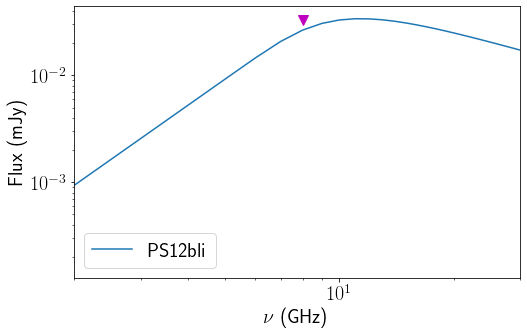

In [38]:
#PS12bli

#Synchrotron model of the fluxes
import numpy as np
plt.rc('text', usetex=True)

t =947.656013456685
t_p = 947.656013456685 #days
nu =np.arange(1, 100, dtype=float)
nu_p = 10 #GHz
F_nup = 0.033 #mjansky 2.72E-05
m = 0.88 #using stAandard model
p = 3.0 #using standard model
a = (2*m)+0.5
b = (p+5-(6*m))/2

F_nu = F_nup*1.582*(t/t_p)**a*(nu/nu_p)**(5/2)*(1-np.exp(-(t/t_p)**(-(a+b))*(nu/nu_p)**(-(p+4)/2)))

print(F_nu)                  

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(8,5))
#plt.ylim(0.0001400,0.01570)
plt.xlim(2, 30)
plt.xscale('log')
plt.yscale('log')
ax=plt.subplot(111)
plt.plot(8,0.033, 'mv', markersize=10) 
plt.plot(nu,F_nu, label ='PS12bli')
plt.xlabel(r'$\nu$ (GHz)', fontsize=20) #Log$_{10}$ t$_{rest}$(days)($\u03BD$ /5 GHz)', fontsize=14)
plt.ylabel('Flux (mJy)', fontsize=20) #Log$_{10}$ Luminosity (erg $s^{-1}$ $Hz^{-1}$)', fontsize =14)
plt.legend(frameon=True, framealpha=0.1, loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='lower left')#, bbox_to_anchor=(1, 0.5))
#plt.show()
plt.savefig('synPS12bli.pdf')

In [39]:
#PS12bli

#Radius at time t_p in centimeters
alpha = 1  #fraction of charged particles and magnetic field (epsilon_e/epsilon_b)
f =  0.5   # filling factor (fraction of the emiting region)
D =   927.3   # in Mpc distance to the SN

R = 4.0e14*(alpha)**(-1/19)*(f/0.5)**(-1/19)*(F_nup)**(9/19)*(D)**(18/19)*(nu_p/5)**(-1)

# Magnetic field flux
B = 1.1*(alpha)**(-4/19)*(f/0.5)**(-4/19)*(F_nup)**(-2/19)*(D)**(-4/19)*(nu_p/5)

#Internal energy of the emitting material
epsilon_b = 0.1
E = (1/epsilon_b)*((B**2)/(8* 3.142))*((4*3.142*f*R**3)/3)

#expansion velocity in km/s
v = (R/t)*1.1574e-10

#pre-explosion mass-loss in 1e-5 solar mass per year
v_w = 1000  #wind speed in km/s
M = 1.0*(alpha)**(-8/19)*epsilon_b*(f)**(-8/19)*(F_nup)**(-4/19)*(D)**(-4/19)*(nu_p/5)*(t_p/10)*(v_w/1000)

print (R)
print (B)
print(E)
print(v)
print(M)


2.5723153734182816e+16
0.7476367354223808
7.928164611211422e+48
3141.6439835955302
12.349348397681254


[9.60522866e-05 5.43353785e-04 1.49730696e-03 3.07367317e-03
 5.36942052e-03 8.44855990e-03 1.20705394e-02 1.54290125e-02
 1.78434131e-02 1.92002827e-02 1.97155089e-02 1.96630094e-02
 1.92644956e-02 1.86729708e-02 1.79862944e-02 1.72643414e-02
 1.65424940e-02 1.58408447e-02 1.51701149e-02 1.45353599e-02
 1.39382603e-02 1.33785316e-02 1.28547875e-02 1.23650665e-02
 1.19071505e-02 1.14787552e-02 1.10776400e-02 1.07016696e-02
 1.03488452e-02 1.00173164e-02 9.70538360e-03 9.41149244e-03
 9.13422613e-03 8.87229525e-03 8.62452732e-03 8.38985640e-03
 8.16731314e-03 7.95601548e-03 7.75516009e-03 7.56401460e-03
 7.38191051e-03 7.20823691e-03 7.04243472e-03 6.88399167e-03
 6.73243765e-03 6.58734072e-03 6.44830341e-03 6.31495948e-03
 6.18697104e-03 6.06402587e-03 5.94583517e-03 5.83213140e-03
 5.72266642e-03 5.61720979e-03 5.51554728e-03 5.41747946e-03
 5.32282048e-03 5.23139695e-03 5.14304691e-03 5.05761895e-03
 4.97497135e-03 4.89497133e-03 4.81749436e-03 4.74242357e-03
 4.66964912e-03 4.599067

/usr/lib/python3/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


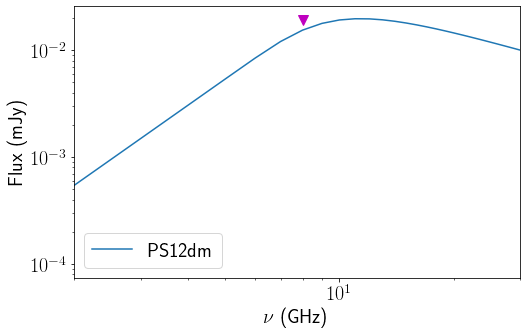

In [40]:
#PS12dm

#Synchrotron model of the fluxes
import numpy as np
plt.rc('text', usetex=True)

t =1132.31215653622
t_p = 1132.31215653622 #days
nu =np.arange(1, 100, dtype=float)
nu_p = 10 #GHz
F_nup = 0.0192 #mjansky 2.72E-05
m = 0.88 #using stAandard model
p = 3.0 #using standard model
a = (2*m)+0.5
b = (p+5-(6*m))/2

F_nu = F_nup*1.582*(t/t_p)**a*(nu/nu_p)**(5/2)*(1-np.exp(-(t/t_p)**(-(a+b))*(nu/nu_p)**(-(p+4)/2)))

print(F_nu)                  

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(8,5))
#plt.ylim(0.0001400,0.01570)
plt.xlim(2, 30)
plt.xscale('log')
plt.yscale('log')
ax=plt.subplot(111)
plt.plot(8,0.0192, 'mv', markersize=10) 
plt.plot(nu,F_nu, label ='PS12dm')
plt.xlabel(r'$\nu$ (GHz)', fontsize=20) #Log$_{10}$ t$_{rest}$(days)($\u03BD$ /5 GHz)', fontsize=14)
plt.ylabel('Flux (mJy)', fontsize=20) #Log$_{10}$ Luminosity (erg $s^{-1}$ $Hz^{-1}$)', fontsize =14)
plt.legend(frameon=True, framealpha=0.1, loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='lower left')#, bbox_to_anchor=(1, 0.5))
#plt.show()
plt.savefig('synPS12dm.pdf')

In [41]:
#PS12dm

#Radius at time t_p in centimeters
alpha = 1  #fraction of charged particles and magnetic field (epsilon_e/epsilon_b)
f =  0.5   # filling factor (fraction of the emiting region)
D =   993.3   # in Mpc distance to the SN

R = 4.0e14*(alpha)**(-1/19)*(f/0.5)**(-1/19)*(F_nup)**(9/19)*(D)**(18/19)*(nu_p/5)**(-1)

# Magnetic field flux
B = 1.1*(alpha)**(-4/19)*(f/0.5)**(-4/19)*(F_nup)**(-2/19)*(D)**(-4/19)*(nu_p/5)

#Internal energy of the emitting material
epsilon_b = 0.1
E = (1/epsilon_b)*((B**2)/(8* 3.142))*((4*3.142*f*R**3)/3)

#expansion velocity in km/s
v = (R/t)*1.1574e-10

#pre-explosion mass-loss in 1e-5 solar mass per year
v_w = 1000  #wind speed in km/s
M = 1.0*(alpha)**(-8/19)*epsilon_b*(f)**(-8/19)*(F_nup)**(-4/19)*(D)**(-4/19)*(nu_p/5)*(t_p/10)*(v_w/1000)

print (R)
print (B)
print(E)
print(v)
print(M)


2.12420415204503e+16
0.7801237728546242
4.8610998182102706e+48
2171.2686483007606
16.300150072679227


[0.00011256 0.00063674 0.00175466 0.00360196 0.00629229 0.00990066
 0.01414516 0.01808087 0.02091025 0.02250033 0.02310411 0.02304259
 0.02257558 0.02188239 0.02107769 0.02023165 0.01938574 0.01856349
 0.01777748 0.01703362 0.0163339  0.01567797 0.0150642  0.01449031
 0.01395369 0.01345167 0.01298161 0.01254102 0.01212755 0.01173904
 0.0113735  0.01102909 0.01070417 0.01039722 0.01010687 0.00983186
 0.00957107 0.00932346 0.00908808 0.00886408 0.00865068 0.00844715
 0.00825285 0.00806718 0.00788958 0.00771954 0.00755661 0.00740034
 0.00725036 0.00710628 0.00696778 0.00683453 0.00670625 0.00658267
 0.00646353 0.00634861 0.00623768 0.00613054 0.00602701 0.0059269
 0.00583004 0.00573629 0.0056455  0.00555753 0.00547225 0.00538953
 0.00530928 0.00523137 0.00515571 0.0050822  0.00501075 0.00494128
 0.00487371 0.00480795 0.00474395 0.00468162 0.0046209  0.00456174
 0.00450407 0.00444784 0.00439299 0.00433948 0.00428725 0.00423627
 0.00418648 0.00413784 0.00409033 0.00404389 0.00399849 0.00395

/usr/lib/python3/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


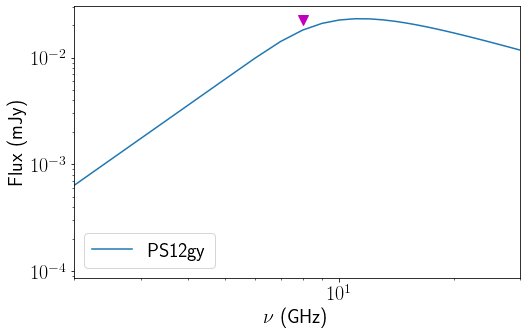

In [42]:
#PS12gy

#Synchrotron model of the fluxes
import numpy as np
plt.rc('text', usetex=True)

t = 1031.40308171206
t_p = 1031.40308171206 #days
nu =np.arange(1, 100, dtype=float)
nu_p = 10 #GHz
F_nup = 0.0225  #mjansky 2.72E-05
m = 0.88 #using stAandard model
p = 3.0 #using standard model
a = (2*m)+0.5
b = (p+5-(6*m))/2

F_nu = F_nup*1.582*(t/t_p)**a*(nu/nu_p)**(5/2)*(1-np.exp(-(t/t_p)**(-(a+b))*(nu/nu_p)**(-(p+4)/2)))

print(F_nu)                  

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(8,5))
#plt.ylim(0.0001400,0.01570)
plt.xlim(2, 30)
plt.xscale('log')
plt.yscale('log')
ax=plt.subplot(111)
plt.plot(8,0.0225, 'mv', markersize=10) 
plt.plot(nu,F_nu, label ='PS12gy')
plt.xlabel(r'$\nu$ (GHz)', fontsize=20) #Log$_{10}$ t$_{rest}$(days)($\u03BD$ /5 GHz)', fontsize=14)
plt.ylabel('Flux (mJy)', fontsize=20) #Log$_{10}$ Luminosity (erg $s^{-1}$ $Hz^{-1}$)', fontsize =14)
plt.legend(frameon=True, framealpha=0.1, loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='lower left')#, bbox_to_anchor=(1, 0.5))
#plt.show()
plt.savefig('synPS12gy.pdf')

In [43]:
#PS12gy

#Radius at time t_p in centimeters
alpha = 1  #fraction of charged particles and magnetic field (epsilon_e/epsilon_b)
f =  0.5   # filling factor (fraction of the emiting region)
D =  1476.4   # in Mpc distance to the SN

R = 4.0e14*(alpha)**(-1/19)*(f/0.5)**(-1/19)*(F_nup)**(9/19)*(D)**(18/19)*(nu_p/5)**(-1)

# Magnetic field flux
B = 1.1*(alpha)**(-4/19)*(f/0.5)**(-4/19)*(F_nup)**(-2/19)*(D)**(-4/19)*(nu_p/5)

#Internal energy of the emitting material
epsilon_b = 0.1
E = (1/epsilon_b)*((B**2)/(8* 3.142))*((4*3.142*f*R**3)/3)

#expansion velocity in km/s
v = (R/t)*1.1574e-10

#pre-explosion mass-loss in 1e-5 solar mass per year
v_w = 1000  #wind speed in km/s
M = 1.0*(alpha)**(-8/19)*epsilon_b*(f)**(-8/19)*(F_nup)**(-4/19)*(D)**(-4/19)*(nu_p/5)*(t_p/10)*(v_w/1000)

print (R)
print (B)
print(E)
print(v)
print(M)


3.333409714477161e+16
0.7057913034430254
1.537579038725117e+49
3740.621365152117
13.210400550130018


[0.00013808 0.00078107 0.00215238 0.00441841 0.00771854 0.0121448
 0.0173514  0.02217921 0.02564991 0.02760041 0.02834104 0.02826558
 0.02769271 0.0268424  0.0258553  0.02481749 0.02377984 0.02277121
 0.02180704 0.02089458 0.02003625 0.01923164 0.01847876 0.01777478
 0.01711653 0.01650071 0.01592411 0.01538365 0.01487646 0.01439989
 0.01395149 0.01352902 0.01313045 0.01275392 0.01239776 0.01206042
 0.01174051 0.01143677 0.01114804 0.01087327 0.0106115  0.01036184
 0.0101235  0.00989574 0.00967788 0.0094693  0.00926944 0.00907775
 0.00889377 0.00871704 0.00854714 0.00838369 0.00822633 0.00807474
 0.0079286  0.00778763 0.00765155 0.00752013 0.00739313 0.00727033
 0.00715152 0.00703652 0.00692515 0.00681723 0.00671262 0.00661116
 0.00651271 0.00641714 0.00632433 0.00623416 0.00614652 0.00606131
 0.00597842 0.00589776 0.00581924 0.00574278 0.00566831 0.00559573
 0.00552499 0.00545602 0.00538874 0.00532309 0.00525903 0.00519649
 0.00513541 0.00507576 0.00501747 0.0049605  0.00490481 0.00485

/usr/lib/python3/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


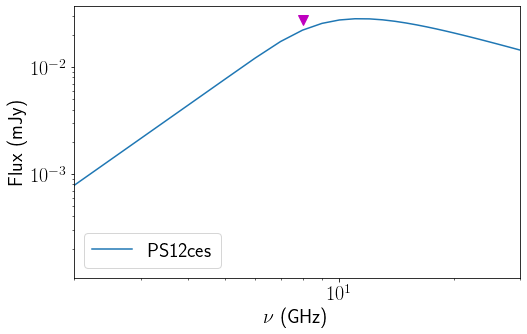

In [44]:
#PS12ces

#Synchrotron model of the fluxes
import numpy as np
plt.rc('text', usetex=True)

t =922.673512154231
t_p = 922.673512154231 #days
nu =np.arange(1, 100, dtype=float)
nu_p = 10 #GHz
F_nup = 0.0276  #mjansky 2.72E-05
m = 0.88 #using stAandard model
p = 3.0 #using standard model
a = (2*m)+0.5
b = (p+5-(6*m))/2

F_nu = F_nup*1.582*(t/t_p)**a*(nu/nu_p)**(5/2)*(1-np.exp(-(t/t_p)**(-(a+b))*(nu/nu_p)**(-(p+4)/2)))

print(F_nu)                  

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(8,5))
#plt.ylim(0.0001400,0.01570)
plt.xlim(2, 30)
plt.xscale('log')
plt.yscale('log')
ax=plt.subplot(111)
plt.plot(8, 0.0276, 'mv', markersize=10) 
plt.plot(nu,F_nu, label ='PS12ces')
plt.xlabel(r'$\nu$ (GHz)', fontsize=20) #Log$_{10}$ t$_{rest}$(days)($\u03BD$ /5 GHz)', fontsize=14)
plt.ylabel('Flux (mJy)', fontsize=20) #Log$_{10}$ Luminosity (erg $s^{-1}$ $Hz^{-1}$)', fontsize =14)
plt.legend(frameon=True, framealpha=0.1, loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='lower left')# bbox_to_anchor=(1, 0.5))
#plt.show()
plt.savefig('synPS12ces.pdf')

In [45]:
#PS12ces

#Radius at time t_p in centimeters
alpha = 1  #fraction of charged particles and magnetic field (epsilon_e/epsilon_b)
f =  0.5   # filling factor (fraction of the emiting region)
D =  949.2    # in Mpc distance to the SN

R = 4.0e14*(alpha)**(-1/19)*(f/0.5)**(-1/19)*(F_nup)**(9/19)*(D)**(18/19)*(nu_p/5)**(-1)

# Magnetic field flux
B = 1.1*(alpha)**(-4/19)*(f/0.5)**(-4/19)*(F_nup)**(-2/19)*(D)**(-4/19)*(nu_p/5)

#Internal energy of the emitting material
epsilon_b = 0.1
E = (1/epsilon_b)*((B**2)/(8* 3.142))*((4*3.142*f*R**3)/3)

#expansion velocity in km/s
v = (R/t)*1.1574e-10

#pre-explosion mass-loss in 1e-5 solar mass per year
v_w = 1000  #wind speed in km/s
M = 1.0*(alpha)**(-8/19)*epsilon_b*(f)**(-8/19)*(F_nup)**(-4/19)*(D)**(-4/19)*(nu_p/5)*(t_p/10)*(v_w/1000)

print (R)
print (B)
print(E)
print(v)
print(M)


2.4163950433679344e+16
0.7580980171190448
6.75730129935524e+48
3031.1216116568808
12.423530601018852


[4.25231477e-05 2.40547249e-04 6.62870271e-04 1.36074073e-03
 2.37708721e-03 3.74024787e-03 5.34372837e-03 6.83055243e-03
 7.89942765e-03 8.50012515e-03 8.72822011e-03 8.70497812e-03
 8.52855274e-03 8.26667980e-03 7.96268244e-03 7.64306783e-03
 7.32349994e-03 7.01287395e-03 6.71593629e-03 6.43492495e-03
 6.17058399e-03 5.92278744e-03 5.69092156e-03 5.47411798e-03
 5.27139477e-03 5.08174058e-03 4.90416352e-03 4.73771833e-03
 4.58152001e-03 4.43474947e-03 4.29665420e-03 4.16654613e-03
 4.04379803e-03 3.92783904e-03 3.81815011e-03 3.71425934e-03
 3.61573759e-03 3.52219435e-03 3.43327400e-03 3.34865229e-03
 3.26803330e-03 3.19114655e-03 3.11774454e-03 3.04760048e-03
 2.98050625e-03 2.91627063e-03 2.85471765e-03 2.79568519e-03
 2.73902364e-03 2.68459479e-03 2.63227078e-03 2.58193317e-03
 2.53347211e-03 2.48678558e-03 2.44177874e-03 2.39836330e-03
 2.35645698e-03 2.31598302e-03 2.27686972e-03 2.23905005e-03
 2.20246127e-03 2.16704460e-03 2.13274490e-03 2.09951044e-03
 2.06729258e-03 2.036045

/usr/lib/python3/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


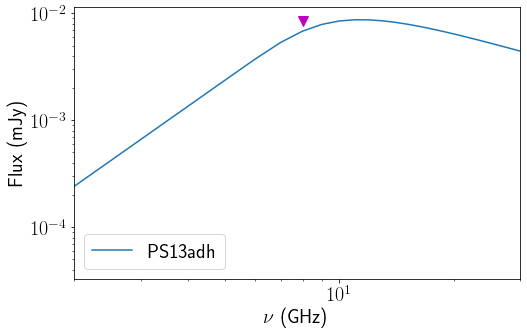

In [46]:
#PS13adh

#Synchrotron model of the fluxes
import numpy as np
plt.rc('text', usetex=True)

t =834.012304309588
t_p = 834.012304309588 #days
nu =np.arange(1, 100, dtype=float)
nu_p = 10 #GHz
F_nup = 0.0085 #mjansky 2.72E-05
m = 0.88 #using stAandard model
p = 3.0 #using standard model
a = (2*m)+0.5
b = (p+5-(6*m))/2

F_nu = F_nup*1.582*(t/t_p)**a*(nu/nu_p)**(5/2)*(1-np.exp(-(t/t_p)**(-(a+b))*(nu/nu_p)**(-(p+4)/2)))

print(F_nu)                  

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(8,5))
#plt.ylim(0.0001400,0.01570)
plt.xlim(2, 30)
plt.xscale('log')
plt.yscale('log')
ax=plt.subplot(111)
plt.plot(8,0.0085, 'mv', markersize=10) 
plt.plot(nu,F_nu, label ='PS13adh')
plt.xlabel(r'$\nu$ (GHz)', fontsize=20) #Log$_{10}$ t$_{rest}$(days)($\u03BD$ /5 GHz)', fontsize=14)
plt.ylabel('Flux (mJy)', fontsize=20) #Log$_{10}$ Luminosity (erg $s^{-1}$ $Hz^{-1}$)', fontsize =14)
plt.legend(frameon=True, framealpha=0.1, loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='lower left')#, bbox_to_anchor=(1, 0.5))
#plt.show()
plt.savefig('synPS13adh.pdf')

In [47]:
#PS13adh

#Radius at time t_p in centimeters
alpha = 1  #fraction of charged particles and magnetic field (epsilon_e/epsilon_b)
f =  0.5   # filling factor (fraction of the emiting region)
D =  650.7  # in Mpc distance to the SN

R = 4.0e14*(alpha)**(-1/19)*(f/0.5)**(-1/19)*(F_nup)**(9/19)*(D)**(18/19)*(nu_p/5)**(-1)

# Magnetic field flux
B = 1.1*(alpha)**(-4/19)*(f/0.5)**(-4/19)*(F_nup)**(-2/19)*(D)**(-4/19)*(nu_p/5)

#Internal energy of the emitting material
epsilon_b = 0.1
E = (1/epsilon_b)*((B**2)/(8* 3.142))*((4*3.142*f*R**3)/3)

#expansion velocity in km/s
v = (R/t)*1.1574e-10

#pre-explosion mass-loss in 1e-5 solar mass per year
v_w = 1000  #wind speed in km/s
M = 1.0*(alpha)**(-8/19)*epsilon_b*(f)**(-8/19)*(F_nup)**(-4/19)*(D)**(-4/19)*(nu_p/5)*(t_p/10)*(v_w/1000)

print (R)
print (B)
print(E)
print(v)
print(M)


9672451636163978.0
0.9291543986982623
6.510348378923506e+47
1342.2938085983692
15.580200217103798


[6.65362193e-05 3.76385695e-04 1.03719701e-03 2.12915902e-03
 3.71944234e-03 5.85238785e-03 8.36136321e-03 1.06878056e-02
 1.23602809e-02 1.33001958e-02 1.36570973e-02 1.36207305e-02
 1.33446766e-02 1.29349225e-02 1.24592560e-02 1.19591532e-02
 1.14591234e-02 1.09730851e-02 1.05084650e-02 1.00687649e-02
 9.65514906e-03 9.26742035e-03 8.90461845e-03 8.56538461e-03
 8.24818240e-03 7.95142937e-03 7.67357351e-03 7.41313573e-03
 7.16873130e-03 6.93907858e-03 6.72300010e-03 6.51941924e-03
 6.32735456e-03 6.14591285e-03 5.97428194e-03 5.81172344e-03
 5.65756587e-03 5.51119822e-03 5.37206402e-03 5.23965594e-03
 5.11351093e-03 4.99320577e-03 4.87835322e-03 4.76859840e-03
 4.66361567e-03 4.56310581e-03 4.46679351e-03 4.37442506e-03
 4.28576639e-03 4.20060126e-03 4.11872957e-03 4.03996602e-03
 3.96413871e-03 3.89108803e-03 3.82066557e-03 3.75273317e-03
 3.68716211e-03 3.62383226e-03 3.56263145e-03 3.50345479e-03
 3.44620411e-03 3.39078743e-03 3.33711849e-03 3.28511633e-03
 3.23470486e-03 3.185812

/usr/lib/python3/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


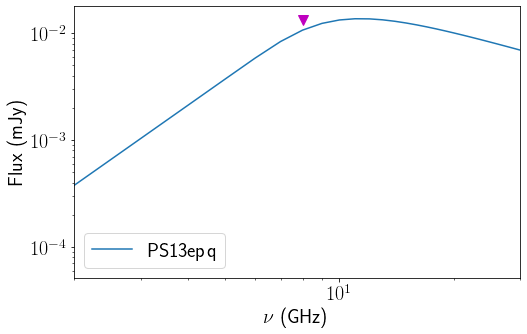

In [48]:
#PS13epq

#Synchrotron model of the fluxes
import numpy as np
plt.rc('text', usetex=True)

t =562.926249008722
t_p = 562.926249008722 #days
nu =np.arange(1, 100, dtype=float)
nu_p = 10 #GHz
F_nup = 0.0133 #mjansky 2.72E-05
m = 0.88 #using stAandard model
p = 3.0 #using standard model
a = (2*m)+0.5
b = (p+5-(6*m))/2

F_nu = F_nup*1.582*(t/t_p)**a*(nu/nu_p)**(5/2)*(1-np.exp(-(t/t_p)**(-(a+b))*(nu/nu_p)**(-(p+4)/2)))

print(F_nu)                  

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(8,5))
#plt.ylim(0.0001400,0.01570)
plt.xlim(2, 30)
plt.xscale('log')
plt.yscale('log')
ax=plt.subplot(111)
plt.plot(8, 0.0133, 'mv', markersize=10) 
plt.plot(nu,F_nu, label ='PS13epq')
plt.xlabel(r'$\nu$ (GHz)', fontsize=20) #Log$_{10}$ t$_{rest}$(days)($\u03BD$ /5 GHz)', fontsize=14)
plt.ylabel('Flux (mJy)', fontsize=20) #Log$_{10}$ Luminosity (erg $s^{-1}$ $Hz^{-1}$)', fontsize =14)
plt.legend(frameon=True, framealpha=0.1, loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='lower left')#, bbox_to_anchor=(1, 0.5))
#plt.show()
plt.savefig('synPS13epq.pdf')

In [49]:
#PS13epq

#Radius at time t_p in centimeters
alpha = 1  #fraction of charged particles and magnetic field (epsilon_e/epsilon_b)
f =  0.5   # filling factor (fraction of the emiting region)
D =  1334.7  # in Mpc distance to the SN

R = 4.0e14*(alpha)**(-1/19)*(f/0.5)**(-1/19)*(F_nup)**(9/19)*(D)**(18/19)*(nu_p/5)**(-1)

# Magnetic field flux
B = 1.1*(alpha)**(-4/19)*(f/0.5)**(-4/19)*(F_nup)**(-2/19)*(D)**(-4/19)*(nu_p/5)

#Internal energy of the emitting material
epsilon_b = 0.1
E = (1/epsilon_b)*((B**2)/(8* 3.142))*((4*3.142*f*R**3)/3)

#expansion velocity in km/s
v = (R/t)*1.1574e-10

#pre-explosion mass-loss in 1e-5 solar mass per year
v_w = 1000  #wind speed in km/s
M = 1.0*(alpha)**(-8/19)*epsilon_b*(f)**(-8/19)*(F_nup)**(-4/19)*(D)**(-4/19)*(nu_p/5)*(t_p/10)*(v_w/1000)

print (R)
print (B)
print(E)
print(v)
print(M)


2.3616629967266656e+16
0.7619675463540903
6.373022878029267e+48
4855.678265536151
8.226859152498523


[0.00011606 0.00065655 0.00180925 0.00371402 0.00648805 0.01020868
 0.01458524 0.01864339 0.02156079 0.02320034 0.02382291 0.02375947
 0.02327793 0.02256317 0.02173344 0.02086108 0.01998885 0.01914102
 0.01833056 0.01756356 0.01684206 0.01616573 0.01553287 0.01494112
 0.01438781 0.01387016 0.01338548 0.01293118 0.01250485 0.01210426
 0.01172734 0.01137222 0.01103719 0.01072069 0.0104213  0.01013774
 0.00986884 0.00961352 0.00937082 0.00913985 0.00891981 0.00870995
 0.00850961 0.00831816 0.00813503 0.0079597  0.0077917  0.00763058
 0.00747592 0.00732736 0.00718455 0.00704716 0.00691489 0.00678746
 0.00666462 0.00654612 0.00643174 0.00632127 0.00621452 0.00611129
 0.00601142 0.00591476 0.00582114 0.00573043 0.00564249 0.00555721
 0.00547445 0.00539412 0.00531611 0.00524031 0.00516664 0.00509501
 0.00502534 0.00495753 0.00489154 0.00482727 0.00476466 0.00470366
 0.0046442  0.00458622 0.00452966 0.00447449 0.00442063 0.00436806
 0.00431672 0.00426658 0.00421758 0.0041697  0.00412288 0.0040

/usr/lib/python3/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


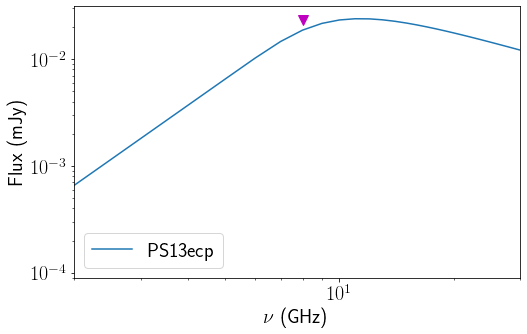

In [50]:
#PS13ecp

#Synchrotron model of the fluxes
import numpy as np
plt.rc('text', usetex=True)

t =618.078800675676
t_p = 618.078800675676 #days
nu =np.arange(1, 100, dtype=float)
nu_p = 10 #GHz
F_nup = 0.0232 #mjansky 2.72E-05
m = 0.88 #using stAandard model
p = 3.0 #using standard model
a = (2*m)+0.5
b = (p+5-(6*m))/2

F_nu = F_nup*1.582*(t/t_p)**a*(nu/nu_p)**(5/2)*(1-np.exp(-(t/t_p)**(-(a+b))*(nu/nu_p)**(-(p+4)/2)))

print(F_nu)                  

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(8,5))
#plt.ylim(0.0001400,0.01570)
plt.xlim(2, 30)
plt.xscale('log')
plt.yscale('log')
ax=plt.subplot(111)
plt.plot(8,0.0232, 'mv', markersize=10) 
plt.plot(nu,F_nu, label ='PS13ecp')
plt.xlabel(r'$\nu$ (GHz)', fontsize=20) #Log$_{10}$ t$_{rest}$(days)($\u03BD$ /5 GHz)', fontsize=14)
plt.ylabel('Flux (mJy)', fontsize=20) #Log$_{10}$ Luminosity (erg $s^{-1}$ $Hz^{-1}$)', fontsize =14)
plt.legend(frameon=True, framealpha=0.1, loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='lower left')#, bbox_to_anchor=(1, 0.5))
#plt.show()
plt.savefig('synPS13ecp.pdf')

In [51]:
#PS13ecp

#Radius at time t_p in centimeters
alpha = 1  #fraction of charged particles and magnetic field (epsilon_e/epsilon_b)
f =  0.5   # filling factor (fraction of the emiting region)
D =  900.0   # in Mpc distance to the SN

R = 4.0e14*(alpha)**(-1/19)*(f/0.5)**(-1/19)*(F_nup)**(9/19)*(D)**(18/19)*(nu_p/5)**(-1)

# Magnetic field flux
B = 1.1*(alpha)**(-4/19)*(f/0.5)**(-4/19)*(F_nup)**(-2/19)*(D)**(-4/19)*(nu_p/5)

#Internal energy of the emitting material
epsilon_b = 0.1
E = (1/epsilon_b)*((B**2)/(8* 3.142))*((4*3.142*f*R**3)/3)

#expansion velocity in km/s
v = (R/t)*1.1574e-10

#pre-explosion mass-loss in 1e-5 solar mass per year
v_w = 1000  #wind speed in km/s
M = 1.0*(alpha)**(-8/19)*epsilon_b*(f)**(-8/19)*(F_nup)**(-4/19)*(D)**(-4/19)*(nu_p/5)*(t_p/10)*(v_w/1000)

print (R)
print (B)
print(E)
print(v)
print(M)


2.1161357477575284e+16
0.7807837853369066
4.814053325046133e+48
3962.6266291241695
8.729418543404735


[0.00010756 0.00060844 0.00167667 0.00344187 0.00601263 0.00946063
 0.01351649 0.01727728 0.01998091 0.02150032 0.02207726 0.02201847
 0.02157222 0.02090984 0.0201409  0.01933247 0.01852415 0.01773845
 0.01698737 0.01627657 0.01560795 0.01498117 0.01439468 0.0138463
 0.01333353 0.01285381 0.01240465 0.01198364 0.01158855 0.01121731
 0.01086801 0.01053891 0.01022843 0.00993512 0.00965767 0.00939489
 0.00914569 0.00890908 0.00868416 0.00847012 0.0082662  0.00807172
 0.00788606 0.00770864 0.00753893 0.00737645 0.00722076 0.00707144
 0.00692812 0.00679045 0.0066581  0.00653077 0.00640819 0.0062901
 0.00617626 0.00606645 0.00596045 0.00585807 0.00575914 0.00566348
 0.00557093 0.00548135 0.00539459 0.00531053 0.00522903 0.00515
 0.00507331 0.00499886 0.00492657 0.00485632 0.00478805 0.00472167
 0.0046571  0.00459427 0.0045331  0.00447355 0.00441553 0.004359
 0.00430389 0.00425016 0.00419775 0.00414661 0.00409671 0.00404799
 0.00400041 0.00395394 0.00390853 0.00386416 0.00382078 0.00377836
 0

/usr/lib/python3/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


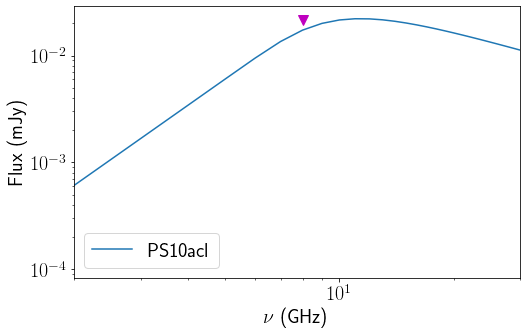

In [52]:
#PS10acl

#Synchrotron model of the fluxes
import numpy as np
plt.rc('text', usetex=True)

t =1488.23113582208
t_p = 1488.23113582208 #days
nu =np.arange(1, 100, dtype=float)
nu_p = 10 #GHz
F_nup = 0.0215  #mjansky 2.72E-05
m = 0.88 #using stAandard model
p = 3.0 #using standard model
a = (2*m)+0.5
b = (p+5-(6*m))/2

F_nu = F_nup*1.582*(t/t_p)**a*(nu/nu_p)**(5/2)*(1-np.exp(-(t/t_p)**(-(a+b))*(nu/nu_p)**(-(p+4)/2)))

print(F_nu)                  

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(8,5))
#plt.ylim(0.0001400,0.01570)
plt.xlim(2, 30)
plt.xscale('log')
plt.yscale('log')
ax=plt.subplot(111)
plt.plot(8, 0.0215, 'mv', markersize=10) 
plt.plot(nu,F_nu, label ='PS10acl')
plt.xlabel(r'$\nu$ (GHz)', fontsize=20) #Log$_{10}$ t$_{rest}$(days)($\u03BD$ /5 GHz)', fontsize=14)
plt.ylabel('Flux (mJy)', fontsize=20) #Log$_{10}$ Luminosity (erg $s^{-1}$ $Hz^{-1}$)', fontsize =14)
plt.legend(frameon=True, framealpha=0.1, loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='lower left')# bbox_to_anchor=(1, 0.5))
#plt.show()
plt.savefig('synPS10acl.pdf')

In [53]:
#PS10acl

#Radius at time t_p in centimeters
alpha = 1  #fraction of charged particles and magnetic field (epsilon_e/epsilon_b)
f =  0.5   # filling factor (fraction of the emiting region)
D =  1323.0  # in Mpc distance to the SN

R = 4.0e14*(alpha)**(-1/19)*(f/0.5)**(-1/19)*(F_nup)**(9/19)*(D)**(18/19)*(nu_p/5)**(-1)

# Magnetic field flux
B = 1.1*(alpha)**(-4/19)*(f/0.5)**(-4/19)*(F_nup)**(-2/19)*(D)**(-4/19)*(nu_p/5)

#Internal energy of the emitting material
epsilon_b = 0.1
E = (1/epsilon_b)*((B**2)/(8* 3.142))*((4*3.142*f*R**3)/3)

#expansion velocity in km/s
v = (R/t)*1.1574e-10

#pre-explosion mass-loss in 1e-5 solar mass per year
v_w = 1000  #wind speed in km/s
M = 1.0*(alpha)**(-8/19)*epsilon_b*(f)**(-8/19)*(F_nup)**(-4/19)*(D)**(-4/19)*(nu_p/5)*(t_p/10)*(v_w/1000)

print (R)
print (B)
print(E)
print(v)
print(M)


2.9403541691872972e+16
0.725746551688386
1.1158033231557606e+49
2286.7186645288884
19.694499465790255


[0.00015458 0.00087446 0.00240973 0.00494669 0.00864141 0.0135969
 0.01942602 0.02483107 0.02871674 0.03090045 0.03172965 0.03164516
 0.0310038  0.03005181 0.02894669 0.0277848  0.02662308 0.02549386
 0.0244144  0.02339284 0.02243189 0.02153107 0.02068817 0.01990003
 0.01916307 0.01847362 0.01782808 0.017223   0.01665517 0.01612162
 0.0156196  0.01514662 0.0147004  0.01427885 0.0138801  0.01350243
 0.01314427 0.01280421 0.01248096 0.01217334 0.01188026 0.01160076
 0.01133392 0.01107892 0.01083502 0.0106015  0.01037774 0.01016314
 0.00995716 0.00975929 0.00956908 0.00938609 0.00920992 0.0090402
 0.00887658 0.00871876 0.00856641 0.00841928 0.00827709 0.00813961
 0.00800659 0.00787784 0.00775315 0.00763234 0.00751522 0.00740162
 0.00729141 0.00718441 0.00708051 0.00697955 0.00688143 0.00678603
 0.00669323 0.00660292 0.00651502 0.00642942 0.00634604 0.00626479
 0.00618559 0.00610837 0.00603304 0.00595955 0.00588783 0.00581781
 0.00574943 0.00568264 0.00561738 0.0055536  0.00549126 0.005430

/usr/lib/python3/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


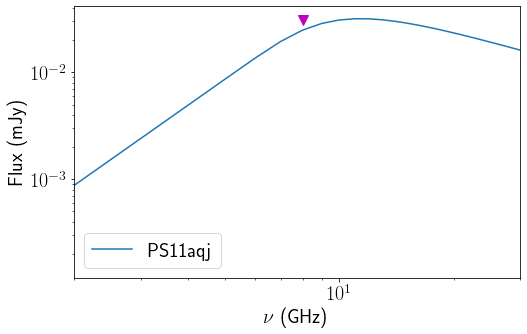

In [54]:
#PS11aqj

#Synchrotron model of the fluxes
import numpy as np
plt.rc('text', usetex=True)

t =1418.70356816102
t_p = 1418.70356816102 #days
nu =np.arange(1, 100, dtype=float)
nu_p = 10 #GHz
F_nup = 0.0309 #mjansky 2.72E-05
m = 0.88 #using stAandard model
p = 3.0 #using standard model
a = (2*m)+0.5
b = (p+5-(6*m))/2

F_nu = F_nup*1.582*(t/t_p)**a*(nu/nu_p)**(5/2)*(1-np.exp(-(t/t_p)**(-(a+b))*(nu/nu_p)**(-(p+4)/2)))

print(F_nu)                  

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(8,5))
#plt.ylim(0.0001400,0.01570)
plt.xlim(2, 30)
plt.xscale('log')
plt.yscale('log')
ax=plt.subplot(111)
plt.plot(8, 0.0309, 'mv', markersize=10) 
plt.plot(nu,F_nu, label ='PS11aqj')
plt.xlabel(r'$\nu$ (GHz)', fontsize=20) #Log$_{10}$ t$_{rest}$(days)($\u03BD$ /5 GHz)', fontsize=14)
plt.ylabel('Flux (mJy)', fontsize=20) #Log$_{10}$ Luminosity (erg $s^{-1}$ $Hz^{-1}$)', fontsize =14)
plt.legend(frameon=True, framealpha=0.1, loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='lower left')#, bbox_to_anchor=(1, 0.5))
#plt.show()
plt.savefig('synPS11aqj.pdf')

In [55]:
#PS11aqj

#Radius at time t_p in centimeters
alpha = 1  #fraction of charged particles and magnetic field (epsilon_e/epsilon_b)
f =  0.5   # filling factor (fraction of the emiting region)
D =  428.9  # in Mpc distance to the SN

R = 4.0e14*(alpha)**(-1/19)*(f/0.5)**(-1/19)*(F_nup)**(9/19)*(D)**(18/19)*(nu_p/5)**(-1)

# Magnetic field flux
B = 1.1*(alpha)**(-4/19)*(f/0.5)**(-4/19)*(F_nup)**(-2/19)*(D)**(-4/19)*(nu_p/5)

#Internal energy of the emitting material
epsilon_b = 0.1
E = (1/epsilon_b)*((B**2)/(8* 3.142))*((4*3.142*f*R**3)/3)

#expansion velocity in km/s
v = (R/t)*1.1574e-10

#pre-explosion mass-loss in 1e-5 solar mass per year
v_w = 1000  #wind speed in km/s
M = 1.0*(alpha)**(-8/19)*epsilon_b*(f)**(-8/19)*(F_nup)**(-4/19)*(D)**(-4/19)*(nu_p/5)*(t_p/10)*(v_w/1000)

print (R)
print (B)
print(E)
print(v)
print(M)


1.2010419073955142e+16
0.8855114875454172
1.1320917798912193e+48
979.8282987484502
22.049278668483836


[0.00020911 0.00118293 0.00325976 0.00669164 0.01168968 0.01839322
 0.02627857 0.03359025 0.0388466  0.04180062 0.04292231 0.04280801
 0.04194041 0.04065261 0.03915766 0.03758591 0.03601439 0.03448684
 0.0330266  0.03164469 0.03034475 0.02912618 0.02798594 0.02691978
 0.02592286 0.02499021 0.02411695 0.02329843 0.0225303  0.02180853
 0.02112943 0.0204896  0.01988597 0.01931573 0.01877631 0.01826542
 0.01778092 0.01732091 0.01688363 0.01646749 0.01607103 0.01569293
 0.01533197 0.01498702 0.01465708 0.01434119 0.01403849 0.01374819
 0.01346955 0.01320189 0.01294458 0.01269704 0.01245872 0.01222913
 0.01200781 0.0117943  0.01158822 0.01138919 0.01119684 0.01101086
 0.01083093 0.01065676 0.01048809 0.01032465 0.01016622 0.01001255
 0.00986345 0.00971872 0.00957816 0.0094416  0.00930887 0.00917981
 0.00905427 0.00893211 0.0088132  0.00869741 0.00858461 0.0084747
 0.00836756 0.0082631  0.0081612  0.00806179 0.00796476 0.00787004
 0.00777755 0.0076872  0.00759892 0.00751264 0.0074283  0.00734

/usr/lib/python3/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


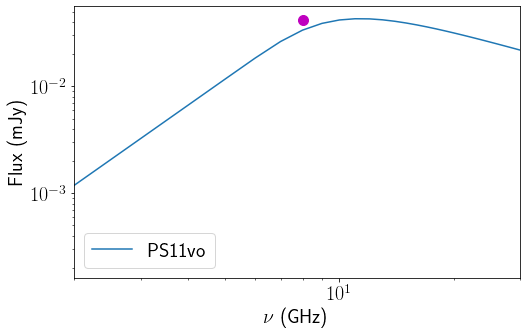

In [56]:
#PS1-11vo

#Synchrotron model of the fluxes
import numpy as np
plt.rc('text', usetex=True)

t =1430.32329749104
t_p = 1430.32329749104 #days
nu =np.arange(1, 100, dtype=float)
nu_p = 10 #GHz
F_nup = 0.0418  #mjansky 2.72E-05
m = 0.88 #using stAandard model
p = 3.0 #using standard model
a = (2*m)+0.5
b = (p+5-(6*m))/2

F_nu = F_nup*1.582*(t/t_p)**a*(nu/nu_p)**(5/2)*(1-np.exp(-(t/t_p)**(-(a+b))*(nu/nu_p)**(-(p+4)/2)))

print(F_nu)                  

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(8,5))
#plt.ylim(0.0001400,0.01570)
plt.xlim(2, 30)
plt.xscale('log')
plt.yscale('log')
ax=plt.subplot(111)
plt.plot(8,0.0418, 'mo', markersize=10) 
plt.plot(nu,F_nu, label ='PS11vo')
plt.xlabel(r'$\nu$ (GHz)', fontsize=20) #Log$_{10}$ t$_{rest}$(days)($\u03BD$ /5 GHz)', fontsize=14)
plt.ylabel('Flux (mJy)', fontsize=20) #Log$_{10}$ Luminosity (erg $s^{-1}$ $Hz^{-1}$)', fontsize =14)
plt.legend(frameon=True, framealpha=0.1, loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='lower left')#, bbox_to_anchor=(1, 0.5))
#plt.show()
plt.savefig('synPS11vo.pdf')

In [57]:
#PS1-11vo

#Radius at time t_p in centimeters
alpha = 1  #fraction of charged particles and magnetic field (epsilon_e/epsilon_b)
f =  0.5   # filling factor (fraction of the emiting region)
D =   543.4  # in Mpc distance to the SN

R = 4.0e14*(alpha)**(-1/19)*(f/0.5)**(-1/19)*(F_nup)**(9/19)*(D)**(18/19)*(nu_p/5)**(-1)

# Magnetic field flux
B = 1.1*(alpha)**(-4/19)*(f/0.5)**(-4/19)*(F_nup)**(-2/19)*(D)**(-4/19)*(nu_p/5)

#Internal energy of the emitting material
epsilon_b = 0.1
E = (1/epsilon_b)*((B**2)/(8* 3.142))*((4*3.142*f*R**3)/3)

#expansion velocity in km/s
v = (R/t)*1.1574e-10

#pre-explosion mass-loss in 1e-5 solar mass per year
v_w = 1000  #wind speed in km/s
M = 1.0*(alpha)**(-8/19)*epsilon_b*(f)**(-8/19)*(F_nup)**(-4/19)*(D)**(-4/19)*(nu_p/5)*(t_p/10)*(v_w/1000)

print (R)
print (B)
print(E)
print(v)
print(M)


1.7340792455061726e+16
0.8161074826183988
2.8941450575618537e+48
1403.1955728256723
19.846215272009854


/usr/lib/python3/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


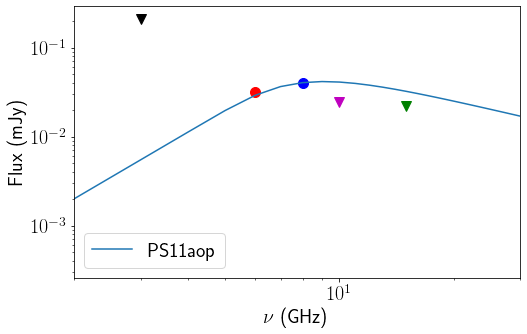

In [2]:
#PS1-11aop


#Synchrotron model of the fluxes
import numpy as np
plt.rc('text', usetex=True)

 #2161.50903119869
t_p = t = 1261.50903119869 #days 1690.01477832512
nu =np.arange(1, 100, dtype=float)
nu_p = 8 #GHz
F_nup = 0.0404 #mjansky 2.72E-05 0.0246#
m = 0.88 #using stAandard model
p = 3.0 #using standard model
a = (2*m)+0.5
b = (p+5-(6*m))/2

F_nu = F_nup*1.582*(t/t_p)**a*(nu/nu_p)**(5/2)*(1-np.exp(-(t/t_p)**(-(a+b))*(nu/nu_p)**(-(p+4)/2)))

#print(F_nu)                  

plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(8,5))
#plt.ylim(0.0001400,0.01570)
plt.xlim(2, 30)
plt.xscale('log')
plt.yscale('log')
ax=plt.subplot(111)
plt.plot(8,0.0404, 'bo', markersize=10) 
plt.plot(6,0.0318, 'ro', markersize=10)
plt.plot(10,0.0246, 'mv', markersize=10)
plt.plot(3,0.211, 'kv', markersize=10)
plt.plot(15,0.0221, 'gv', markersize=10)

plt.plot(nu,F_nu, label ='PS11aop')
plt.xlabel(r'$\nu$ (GHz)', fontsize=20) #Log$_{10}$ t$_{rest}$(days)($\u03BD$ /5 GHz)', fontsize=14)
plt.ylabel('Flux (mJy)', fontsize=20) #Log$_{10}$ Luminosity (erg $s^{-1}$ $Hz^{-1}$)', fontsize =14)
plt.legend(frameon=True, framealpha=0.1, loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='lower left')#, bbox_to_anchor=(1, 0.5))
#plt.show()
plt.savefig('synPS11aop.pdf')

In [3]:
#PS1-11aop

#Radius at time t_p in centimeters
alpha = 1  #fraction of charged particles and magnetic field (epsilon_e/epsilon_b)
f =  0.5   # filling factor (fraction of the emiting region)
D =  1088.1  # in Mpc distance to the SN

R = 4.0e14*(alpha)**(-1/19)*(f/0.5)**(-1/19)*(F_nup)**(9/19)*(D)**(18/19)*(nu_p/5)**(-1)

# Magnetic field flux
B = 1.1*(alpha)**(-4/19)*(f/0.5)**(-4/19)*(F_nup)**(-2/19)*(D)**(-4/19)*(nu_p/5)

#Internal energy of the emitting material
epsilon_b = 0.1
E = (1/epsilon_b)*((B**2)/(8* 3.142))*((4*3.142*f*R**3)/3)

#expansion velocity in km/s
v = (R/t)*1.1574e-10

#pre-explosion mass-loss in 1e-5 solar mass per year
v_w = 1000  #wind speed in km/s
vw_cgs = 100 * 1e5 
M = 1.0*(alpha)**(-8/19)*epsilon_b*(f)**(-8/19)*(F_nup)**(-4/19)*(D)**(-4/19)*(nu_p/5)*(t_p/10)*(v_w/1000)
M_cgs =  M * 1e-5 * 6.307e+25
den = M_cgs/(4*3.142*R**2*vw_cgs)

print (R)
print (B)
print(E)
print(v)
print(M)
print(den)

4.117645952055539e+16
0.5661228304094349
1.864606089831026e+49
3777.8274328964867
12.185813256606835
3.606726191031983e-20


In [4]:
42.49*(1/2)**(1/3)

33.724335349064404

In [5]:
(33.724/(3*1e7**(1/3)))-(2/3)

-0.6144890193917475

In [6]:
1e7**(1/3)

215.4434690031883

In [7]:
215.44*3

646.3199999999999

In [8]:
11.3/646.3199999999999

0.017483599455378144

In [9]:
0.017483599455378144-(2/3)

-0.6491830672112885

In [17]:
11.3/15**(1/3)

4.581925503331962

In [18]:
4.581925503331962-(2/3)

3.9152588366652954

In [32]:
(1.2435e15/(0.63662*6.67e-8))**(3/2)

5.0114051637574414e+33

In [35]:
(1.0036e13/(0.42422*6.67e-8))**(3/2)

6.679831672152978e+30

In [24]:
(2.8e-8*(1.989e33)**0.3)/4.246e-8

6438259486.756935

In [37]:
0.00337*(4/3)**(-2.5)

0.0016416594060488768

In [29]:
1.17+1.125

2.295

In [30]:
1/2.295

0.4357298474945534

In [36]:
6.679831672152978e+30/1.98e33

0.0033736523596732213